## ***Exploratory Data Analysis*** 

In [1]:
# Standard library
import os

# Data handling
import pandas as pd
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from IPython.display import display, Markdown

# Notebook display settings 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# print(plt.style.available)

# Set plotting style and defaults
plt.style.use('seaborn-v0_8-white')

plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'grid.color': 'gray',
    'text.color': 'black',
})

In [2]:
# Read the CSV 
data = pd.read_csv('../data/cleaned_ev.csv') 
data

,brand,car_model,segment,drivetrain,seats,top_speed_kmh,acceleration_0_100_s,torque_nm,torque_nm_mapped,power_to_weight_ratio,...,fast_charging_power_kw_dc,fast_charge_port,range_km,towing_capacity_kg,cargo_volume_l,length_mm,width_mm,height_mm,car_body_type,manufacturing_country
0,Dacia,Spring Electric 45,A - Mini,FWD,4,125,19.1,125.000000,92.195250,0.232000,...,29.0,CCS,165.0,1500.0,308.0,3700,1622,1516,Hatchback,Romania
1,Dacia,Spring Electric 65,A - Mini,FWD,4,125,13.7,113.000000,83.344506,0.256637,...,29.0,CCS,160.0,1500.0,308.0,3700,1622,1516,Hatchback,Romania
2,Citroen,e-SpaceTourer XL 50 kWh,N - Passenger Van,FWD,9,130,13.3,220.000000,162.263640,0.354545,...,78.0,CCS,180.0,1000.0,989.0,5333,1920,1890,Small Passenger Van,France
3,Peugeot,e-Traveller L2 75 kWh,N - Passenger Van,FWD,9,130,14.2,270.000000,199.141740,0.292593,...,79.0,CCS,260.0,1000.0,603.0,4983,1920,1890,Small Passenger Van,France
4,Peugeot,e-Traveller L3 50 kWh,N - Passenger Van,FWD,9,130,13.3,270.000000,199.141740,0.288889,...,78.0,CCS,180.0,1000.0,989.0,5333,1920,1890,Small Passenger Van,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Tesla,Model S Plaid,F - Luxury,AWD,5,282,2.3,498.012739,367.315272,0.281117,...,140.0,CCS,560.0,1600.0,709.0,5021,1987,1431,Liftback Sedan,USA
474,Maserati,GranCabrio Folgore,F - Luxury,AWD,4,290,2.8,1350.000000,995.708700,0.140741,...,190.0,CCS,395.0,1800.0,151.0,4966,1957,1365,Cabriolet,Italy
475,Porsche,Taycan Turbo GT,F - Luxury,AWD,5,290,2.3,1340.000000,988.333080,0.209701,...,281.0,CCS,475.0,2000.0,326.0,4968,1966,1378,Sedan,Germany
476,Porsche,Taycan Turbo GT Weissach,F - Luxury,AWD,2,305,2.2,1340.000000,988.333080,0.209701,...,281.0,CCS,475.0,2000.0,367.0,4968,1966,1378,Sedan,Germany


In [3]:
# Listing all column names for inspection and future referencing
print("Columns:", data.columns.tolist()) 

# Confirming the size of the dataset by outputting the number of rows and columns
print("Shape:", data.shape) 

# Counting and displaying the frequency of each brand in the dataset
title = "Brand Frequency"
frequency_counts = data['brand'].value_counts()
print(f"Data Overview: {title}")
for brand, count in frequency_counts.items():
    print(f"{brand:>15} {count}")

# Displaying overall information about the dataset, which gives an overview of its structure
print(data.info())

Columns: ['brand', 'car_model', 'segment', 'drivetrain', 'seats', 'top_speed_kmh', 'acceleration_0_100_s', 'torque_nm', 'torque_nm_mapped', 'power_to_weight_ratio', 'power_to_weight_category', 'battery_capacity_kWh', 'number_of_cells', 'battery_type', 'efficiency_wh_per_km', 'efficiency', 'fast_charging_power_kw_dc', 'fast_charge_port', 'range_km', 'towing_capacity_kg', 'cargo_volume_l', 'length_mm', 'width_mm', 'height_mm', 'car_body_type', 'manufacturing_country']
Shape: (478, 26)
Data Overview: Brand Frequency
  Mercedes-Benz 42
           Audi 28
        Porsche 26
     Volkswagen 23
           Ford 22
            BMW 20
        Peugeot 19
          Volvo 18
            BYD 17
          Smart 17
            Kia 16
           Opel 14
        Hyundai 14
             MG 12
            NIO 12
        Citroen 12
          Skoda 12
          Tesla 11
        Renault 11
          Zeekr 9
          XPENG 9
       Polestar 9
           Mini 8
           Fiat 8
         Toyota 7
            

### ***Filtering and Indexing: Querying, Masking, and Logical Operators***

In [4]:
# Filtering and indexing
print("\nFiltered DataFrame (number_of_cells > 150):")
print(data.loc[data['number_of_cells'] > 150])


Filtered DataFrame (number_of_cells > 150):
        brand                 car_model            segment drivetrain  seats  \
2     Citroen   e-SpaceTourer XL 50 kWh  N - Passenger Van        FWD      9   
3     Peugeot     e-Traveller L2 75 kWh  N - Passenger Van        FWD      9   
4     Peugeot     e-Traveller L3 50 kWh  N - Passenger Van        FWD      9   
5     Peugeot     e-Traveller L3 75 kWh  N - Passenger Van        FWD      9   
6     Citroen   e-SpaceTourer XL 75 kWh  N - Passenger Van        FWD      9   
..        ...                       ...                ...        ...    ...   
473     Tesla             Model S Plaid         F - Luxury        AWD      5   
474  Maserati        GranCabrio Folgore         F - Luxury        AWD      4   
475   Porsche           Taycan Turbo GT         F - Luxury        AWD      5   
476   Porsche  Taycan Turbo GT Weissach         F - Luxury        AWD      2   
477  Maserati       GranTurismo Folgore         F - Luxury        AWD      

In [5]:
# Filtering data based on a query expression: .query()

# Define the .query() method
def query(data, condition):
    return data.query(condition)

# Querying using a string condition
result_query = query(data, 'brand == "Peugeot" and seats > 8')
print(f"Query Result:\n {result_query}")

# Querying cars with specific characteristics
specific_query = query(data, 'top_speed_kmh > 130 & seats >= 7')
print(f"\nSpecific Query Result (top_speed_kmh > 130 and seats >= 7):\n {specific_query}")

# Summary of counts for different segments
segment_counts = data['segment'].value_counts()
print(f"\nCounts of Different Segments:\n {segment_counts}")

# Finding the car with the highest efficiency
highest_efficiency = data.loc[data['efficiency'].idxmax()]
print(f"\nCar with Highest Efficiency:\n {highest_efficiency}")

# Querying using multiple conditions with logical operators
query_str = 'brand == "Dacia" | (segment == "N - Passenger Van" & top_speed_kmh > 125)'
result = query(data, query_str)
print(f"\nQuery Result:\n {result}")

Query Result:
       brand              car_model            segment drivetrain  seats  \
3   Peugeot  e-Traveller L2 75 kWh  N - Passenger Van        FWD      9   
4   Peugeot  e-Traveller L3 50 kWh  N - Passenger Van        FWD      9   
5   Peugeot  e-Traveller L3 75 kWh  N - Passenger Van        FWD      9   
11  Peugeot  e-Traveller L2 50 kWh  N - Passenger Van        FWD      9   

    top_speed_kmh  acceleration_0_100_s  torque_nm  torque_nm_mapped  \
3             130                  14.2      270.0         199.14174   
4             130                  13.3      270.0         199.14174   
5             130                  14.2      270.0         199.14174   
11            130                  13.3      270.0         199.14174   

    power_to_weight_ratio  ... fast_charging_power_kw_dc  fast_charge_port  \
3                0.292593  ...                      79.0               CCS   
4                0.288889  ...                      78.0               CCS   
5             

In [6]:
# Define the .mask() method
def mask(data, condition):
    return data[condition]

# Masking using a boolean condition
result_mask = mask(data, (data["top_speed_kmh"] > 125) & (data["battery_capacity_kWh"] > 50))
print(f"\nMask Result:\n {result_mask}")

# Masking for electric cars with a certain battery capacity
electric_mask = mask(data, (data["battery_capacity_kWh"] > 60) | (data["battery_capacity_kWh"] < 100))
print(f"\nElectric Cars Mask Result (battery_capacity_kWh > 60 or < 100):\n{electric_mask}")

# Filtering cars with more than a certain towing capacity and not a "Renault"
towing_capacity_threshold = 1500
high_towing_cars = mask(data, (data["towing_capacity_kg"] > towing_capacity_threshold) & ~(data["brand"] == "Renault"))
print(f"\nCars with Towing Capacity Greater Than {towing_capacity_threshold} kg and Not of Brand Renault:\n {high_towing_cars}")


Mask Result:
         brand                 car_model            segment drivetrain  seats  \
3     Peugeot     e-Traveller L2 75 kWh  N - Passenger Van        FWD      9   
5     Peugeot     e-Traveller L3 75 kWh  N - Passenger Van        FWD      9   
6     Citroen   e-SpaceTourer XL 75 kWh  N - Passenger Van        FWD      9   
7     Citroen    e-SpaceTourer M 75 kWh  N - Passenger Van        FWD      9   
14     Toyota     PROACE Verso L 75 kWh  N - Passenger Van        FWD      9   
..        ...                       ...                ...        ...    ...   
473     Tesla             Model S Plaid         F - Luxury        AWD      5   
474  Maserati        GranCabrio Folgore         F - Luxury        AWD      4   
475   Porsche           Taycan Turbo GT         F - Luxury        AWD      5   
476   Porsche  Taycan Turbo GT Weissach         F - Luxury        AWD      2   
477  Maserati       GranTurismo Folgore         F - Luxury        AWD      4   

     top_speed_kmh  acce

In [7]:
# Compute brand-level aggregates and merge them back into a copy of the original
brand_agg = data.groupby('brand', as_index=False).agg(
    torque_nm_mean=('torque_nm', 'mean'),
    number_of_cells_sum=('number_of_cells', 'sum')
)
print(brand_agg)

df_with_brand_metrics = data.copy()
df_with_brand_metrics = df_with_brand_metrics.merge(brand_agg, on='brand', how='left')
print(f"\nCopy of original with brand-level metrics added:\n{df_with_brand_metrics}")

            brand  torque_nm_mean  number_of_cells_sum
0          Abarth      290.000000                588.0
1          Aiways      312.500000                432.0
2            Alfa      302.500000                204.0
3          Alpine      292.500000                368.0
4            Audi      656.892857               6504.0
5             BMW      612.600000               4320.0
6             BYD      392.236043               2223.0
7           CUPRA      451.000000               1368.0
8        Cadillac      610.000000                288.0
9         Citroen      223.750000               2580.0
10             DS      361.200000                510.0
11          Dacia      119.000000                144.0
12       Dongfeng      160.000000                432.0
13         Elaris      320.000000                216.0
14           Fiat      212.750000               1110.0
15        Firefly      200.000000                112.0
16           Ford      570.818182               7112.0
17        

### ***Distribution***

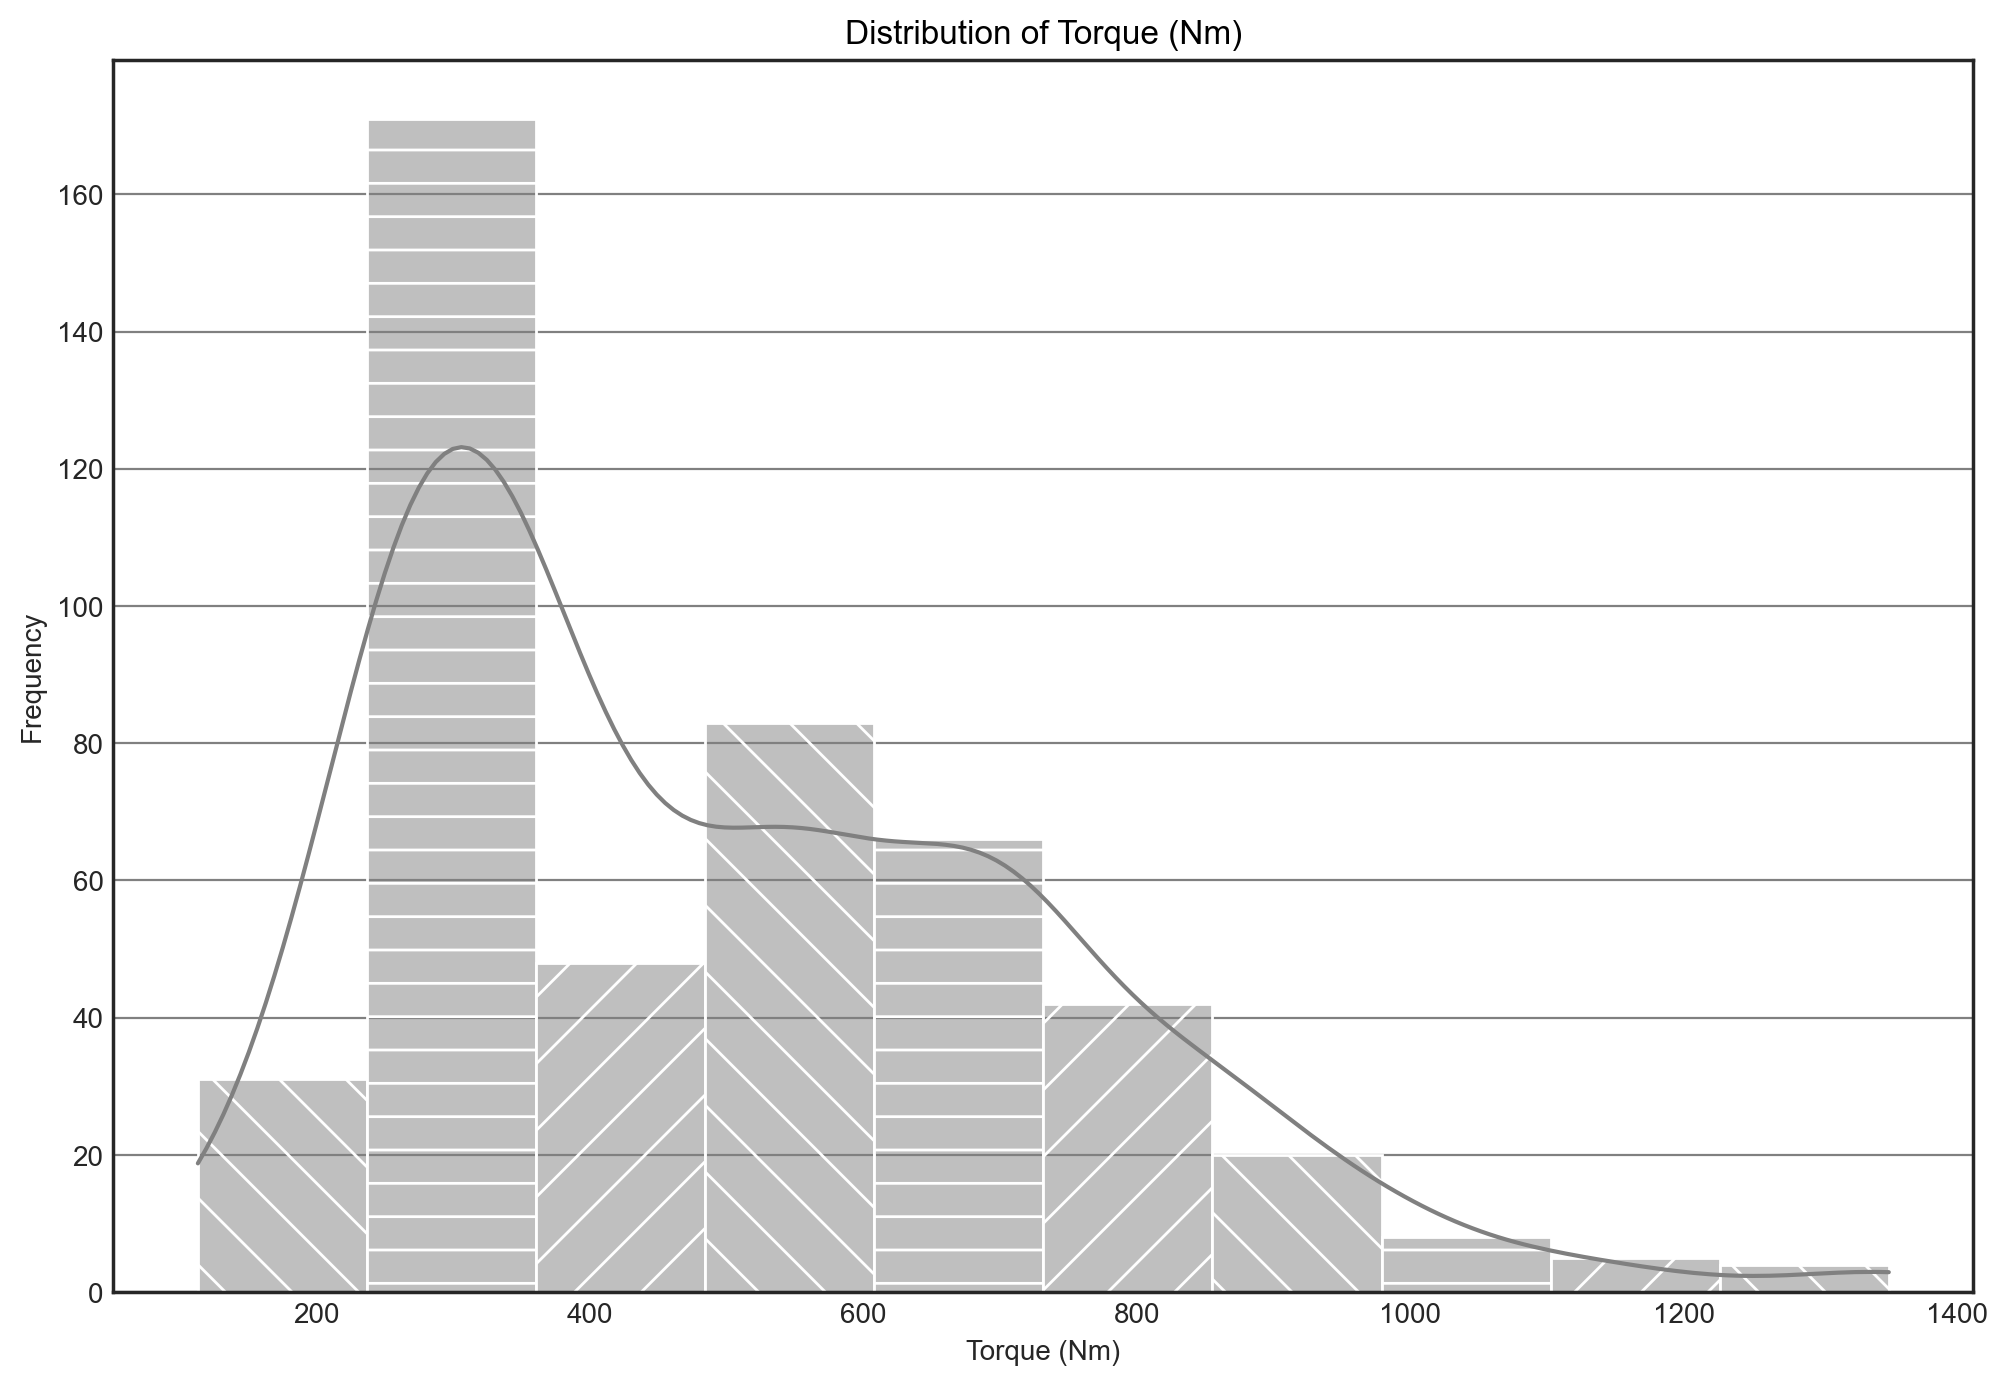

Key Observation:
The histogram of torque values shows a right-skewed distribution, indicated by the longer tail on the right side. The peak occurs around 400 Nm,
with a significant drop in frequency for higher torque values. This suggests that most vehicles have torque values concentrated in the lower range,
with fewer vehicles exhibiting higher torque. The presence of the kernel density estimate (KDE) line further emphasizes the skewness, confirming that 
the torque values do not follow a normal distribution.


In [8]:
# What is the distribution of torque values in the dataset (to indicating whether they follow a normal distribution or are skewed)?

color_palette = [
    '#D3D3D3',  # Light Gray
    '#A9A9A9',  # Medium Gray
    '#BDB76B',  # Light Olive
    '#C2B280',  # Dark Beige
    '#FFD700',  # Gold
    '#808080',  # Gray
    '#808000',  # Olive
    '#6F2C91',  # Eggplant
    '#5C4033',  # Warm Dark Brown
    '#191970',  # Midnight Blue
    '#0F52BA',  # Sapphire
    '#D76D3E',  # Warm Terracotta
    '#CD7F32',  # Bronze
    '#B87333',  # Copper
    '#C0C0C0',  # Silver
    '#8A9A5B',  # Moss Green
    '#4B6F4D',  # Deep Forest Green
    '#F9F5E4'   # Cream
]

# Create the figure for Torque distribution
plt.figure(figsize=(12, 8))

# Create the histogram for torque and assign it to hisplot
hisplot = sns.histplot(data['torque_nm'], bins=10, kde=True, color=color_palette[5])

# Set hatches for the patches in hisplot
hatches = ['\\', '-', '/']        
for num, patch in enumerate(hisplot.patches): 
    patch.set_hatch(hatches[num % len(hatches)])  # Cycle through hatches

# Set titles and labels
plt.title('Distribution of Torque (Nm)')
plt.xlabel('Torque (Nm)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

print("Key Observation:\n"
      "The histogram of torque values shows a right-skewed distribution, indicated by the longer tail on the right side. The peak occurs around 400 Nm,\n" 
      "with a significant drop in frequency for higher torque values. This suggests that most vehicles have torque values concentrated in the lower range,\n"
      "with fewer vehicles exhibiting higher torque. The presence of the kernel density estimate (KDE) line further emphasizes the skewness, confirming that \n" 
      "the torque values do not follow a normal distribution.")

### ***Pivot Table***


Pivot Table showing mean torque by brand:

Dacia: 119.00
Dongfeng: 160.00
Firefly: 200.00
Fiat: 212.75
Citroen: 223.75
Leapmotor: 239.00
Renault: 252.27
Opel: 253.57
Lancia: 260.00
Toyota: 271.57
Abarth: 290.00
Alpine: 292.50
Jeep: 302.50
Alfa: 302.50
Honda: 310.00
Peugeot: 311.95
Aiways: 312.50
Mazda: 320.00
Skywell: 320.00
Elaris: 320.00
Lexus: 333.67
Mini: 335.50
Subaru: 336.00
KGM: 339.00
Omoda: 340.00
Lynk&Co: 343.00
Maxus: 350.00
GWM: 351.67
DS: 361.20
MG: 364.17
Nissan: 381.67
BYD: 392.24
Hyundai: 414.93
Kia: 423.00
Smart: 445.29
CUPRA: 451.00
Tesla: 496.28
Zeekr: 503.78
Volkswagen: 505.96
Skoda: 522.50
VinFast: 560.00
XPENG: 563.44
Ford: 570.82
Volvo: 573.44
Cadillac: 610.00
Genesis: 611.00
BMW: 612.60
Mercedes-Benz: 614.38
Polestar: 636.56
Audi: 656.89
Jaguar: 696.00
Hongqi: 700.00
Voyah: 720.00
Lucid: 732.01
NIO: 775.00
Porsche: 785.73
Lotus: 801.67
Rolls-Royce: 900.00
Maserati: 1173.33


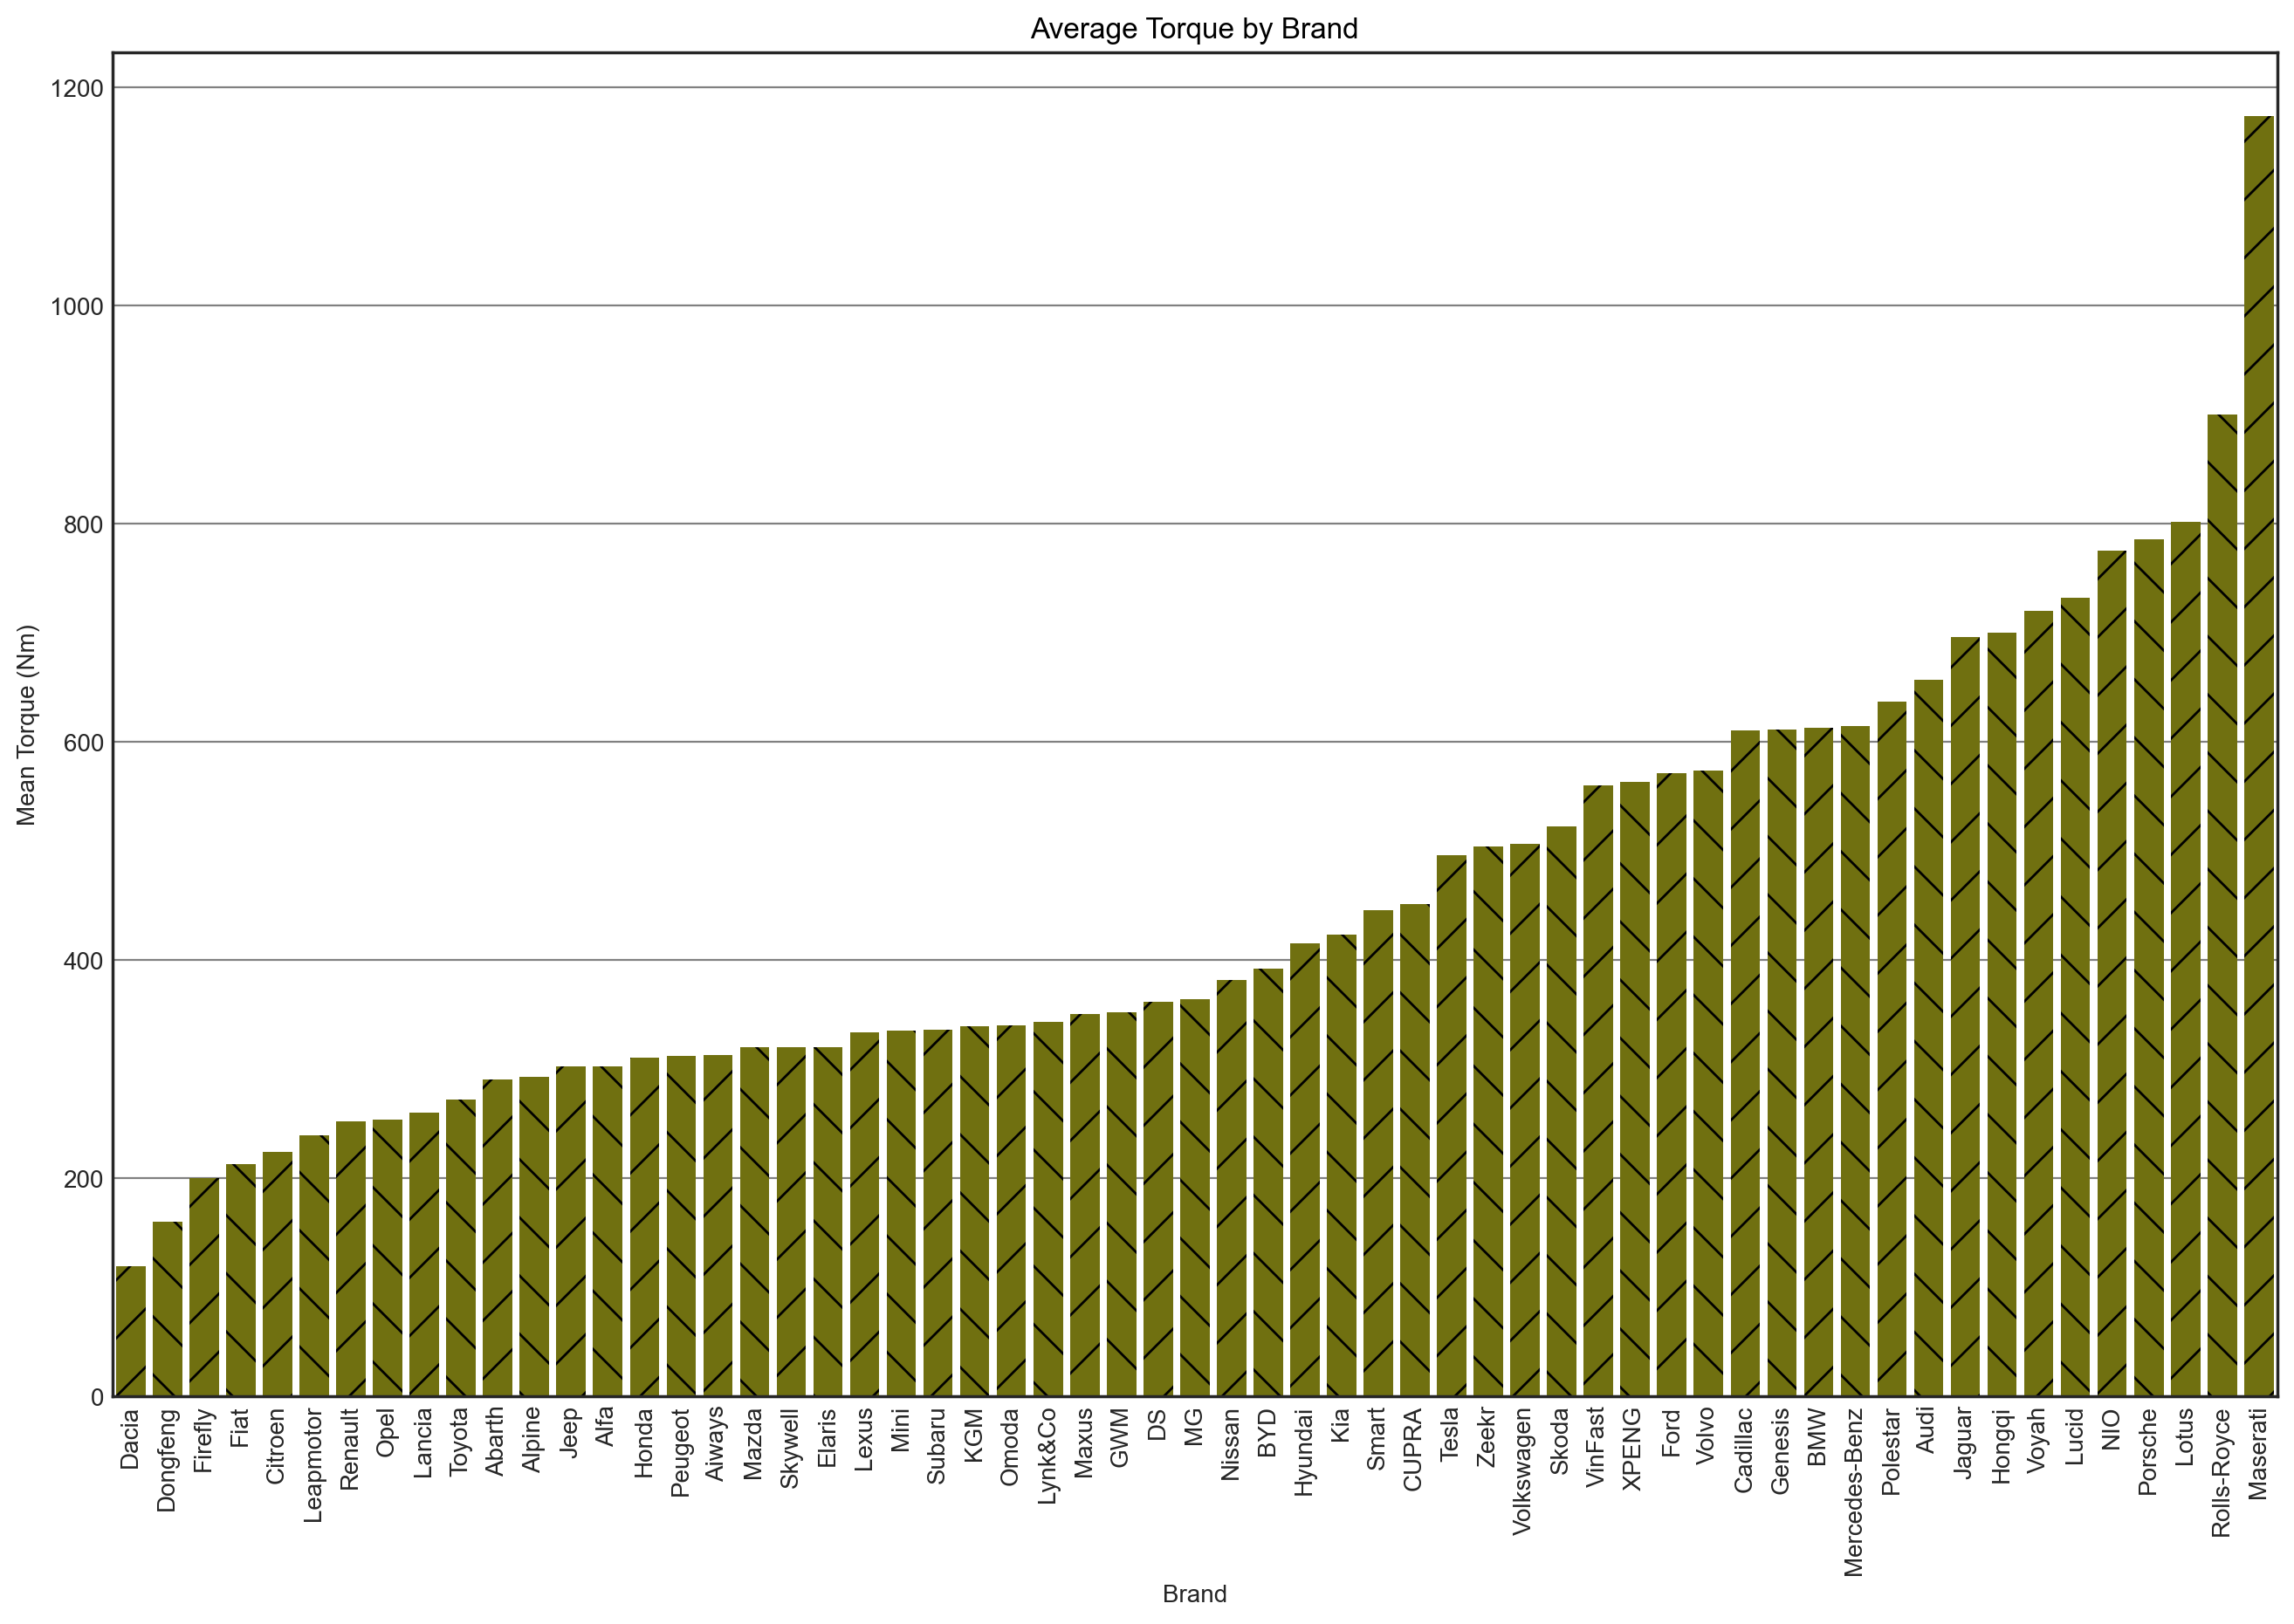

Key Observation:
Maserati leads the high torque segment with a mean torque of 1173.33 Nm, indicating a focus on high-performance applications,
followed by Lotus and Lucid at 801.67 Nm and 732.01 Nm, respectively, which also emphasize performance. Luxury and performance brands
such as Rolls-Royce (900 Nm), Porsche (785.73 Nm), and NIO (775 Nm) further illustrate that these categories typically feature higher torque outputs.
In the mid-range, brands like Audi (656.89 Nm), BMW (612.60 Nm), and Genesis (611 Nm) strike a balance between performance and everyday usability. Conversely,
lower torque brands like Dacia (119 Nm), Dongfeng (160 Nm), and Citroen (223.75 Nm) prioritize economy and efficiency over performance. Overall, a clear trend
emerges where luxury and performance brands dominate higher torque values, while mainstream brands like Ford (570.82 Nm) and Hyundai (414.93 Nm)
also provide competitive torque figures, appealing to a wider market.



In [9]:
# Which brands have the highest and lowest torque values (to identifies brands that may have extreme values)

# Create the pivot table
pivot_table_df = data.pivot_table(values='torque_nm', index='brand', aggfunc='mean')
print("\nPivot Table showing mean torque by brand:\n")

# Sort the pivot table and reassign it
pivot_table_df = pivot_table_df.sort_values(by='torque_nm', ascending=True)  # Change to False for descending

# Print the sorted values
for brand, torque in zip(pivot_table_df.index, pivot_table_df['torque_nm']):
    print(f"{brand}: {torque:.2f}")

plt.figure(figsize=(16, 10))  # Wider figure   
barplot = sns.barplot(data=pivot_table_df.reset_index(), x='brand', y='torque_nm', color=color_palette[6])

# Set hatches for the patches in barplot
hatches = ['/', '\\']        
for num, patch in enumerate(barplot.patches): 
    patch.set_hatch(hatches[num % len(hatches)])  
    
# Plotting the results
plt.title('Average Torque by Brand')
plt.xlabel('Brand')
plt.ylabel('Mean Torque (Nm)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

text = """Key Observation:
Maserati leads the high torque segment with a mean torque of **1173.33 Nm**, indicating a focus on high-performance applications,
followed by **Lotus** and **Lucid** at **801.67 Nm** and **732.01 Nm**, respectively, which also emphasize performance. Luxury and performance brands
such as **Rolls-Royce** (**900 Nm**), **Porsche** (**785.73 Nm**), and **NIO** (**775 Nm**) further illustrate that these categories typically feature higher torque outputs.
In the mid-range, brands like **Audi** (**656.89 Nm**), **BMW** (**612.60 Nm**), and **Genesis** (**611 Nm**) strike a balance between performance and everyday usability. Conversely,
lower torque brands like **Dacia** (**119 Nm**), **Dongfeng** (**160 Nm**), and **Citroen** (**223.75 Nm**) prioritize economy and efficiency over performance. Overall, a clear trend
emerges where luxury and performance brands dominate higher torque values, while mainstream brands like **Ford** (**570.82 Nm**) and **Hyundai** (**414.93 Nm**)
also provide competitive torque figures, appealing to a wider market.
"""

# Remove Markdown bold markers
print(text.replace("**", ""))

### ***Linear Regression: Analysis of Range vs. Battery Capacity***
This section explores how battery capacity (in kWh) influences the range (in km) of electric vehicles. It also examines the differences in this relationship across various drivetrain types (FWD, RWD, AWD).

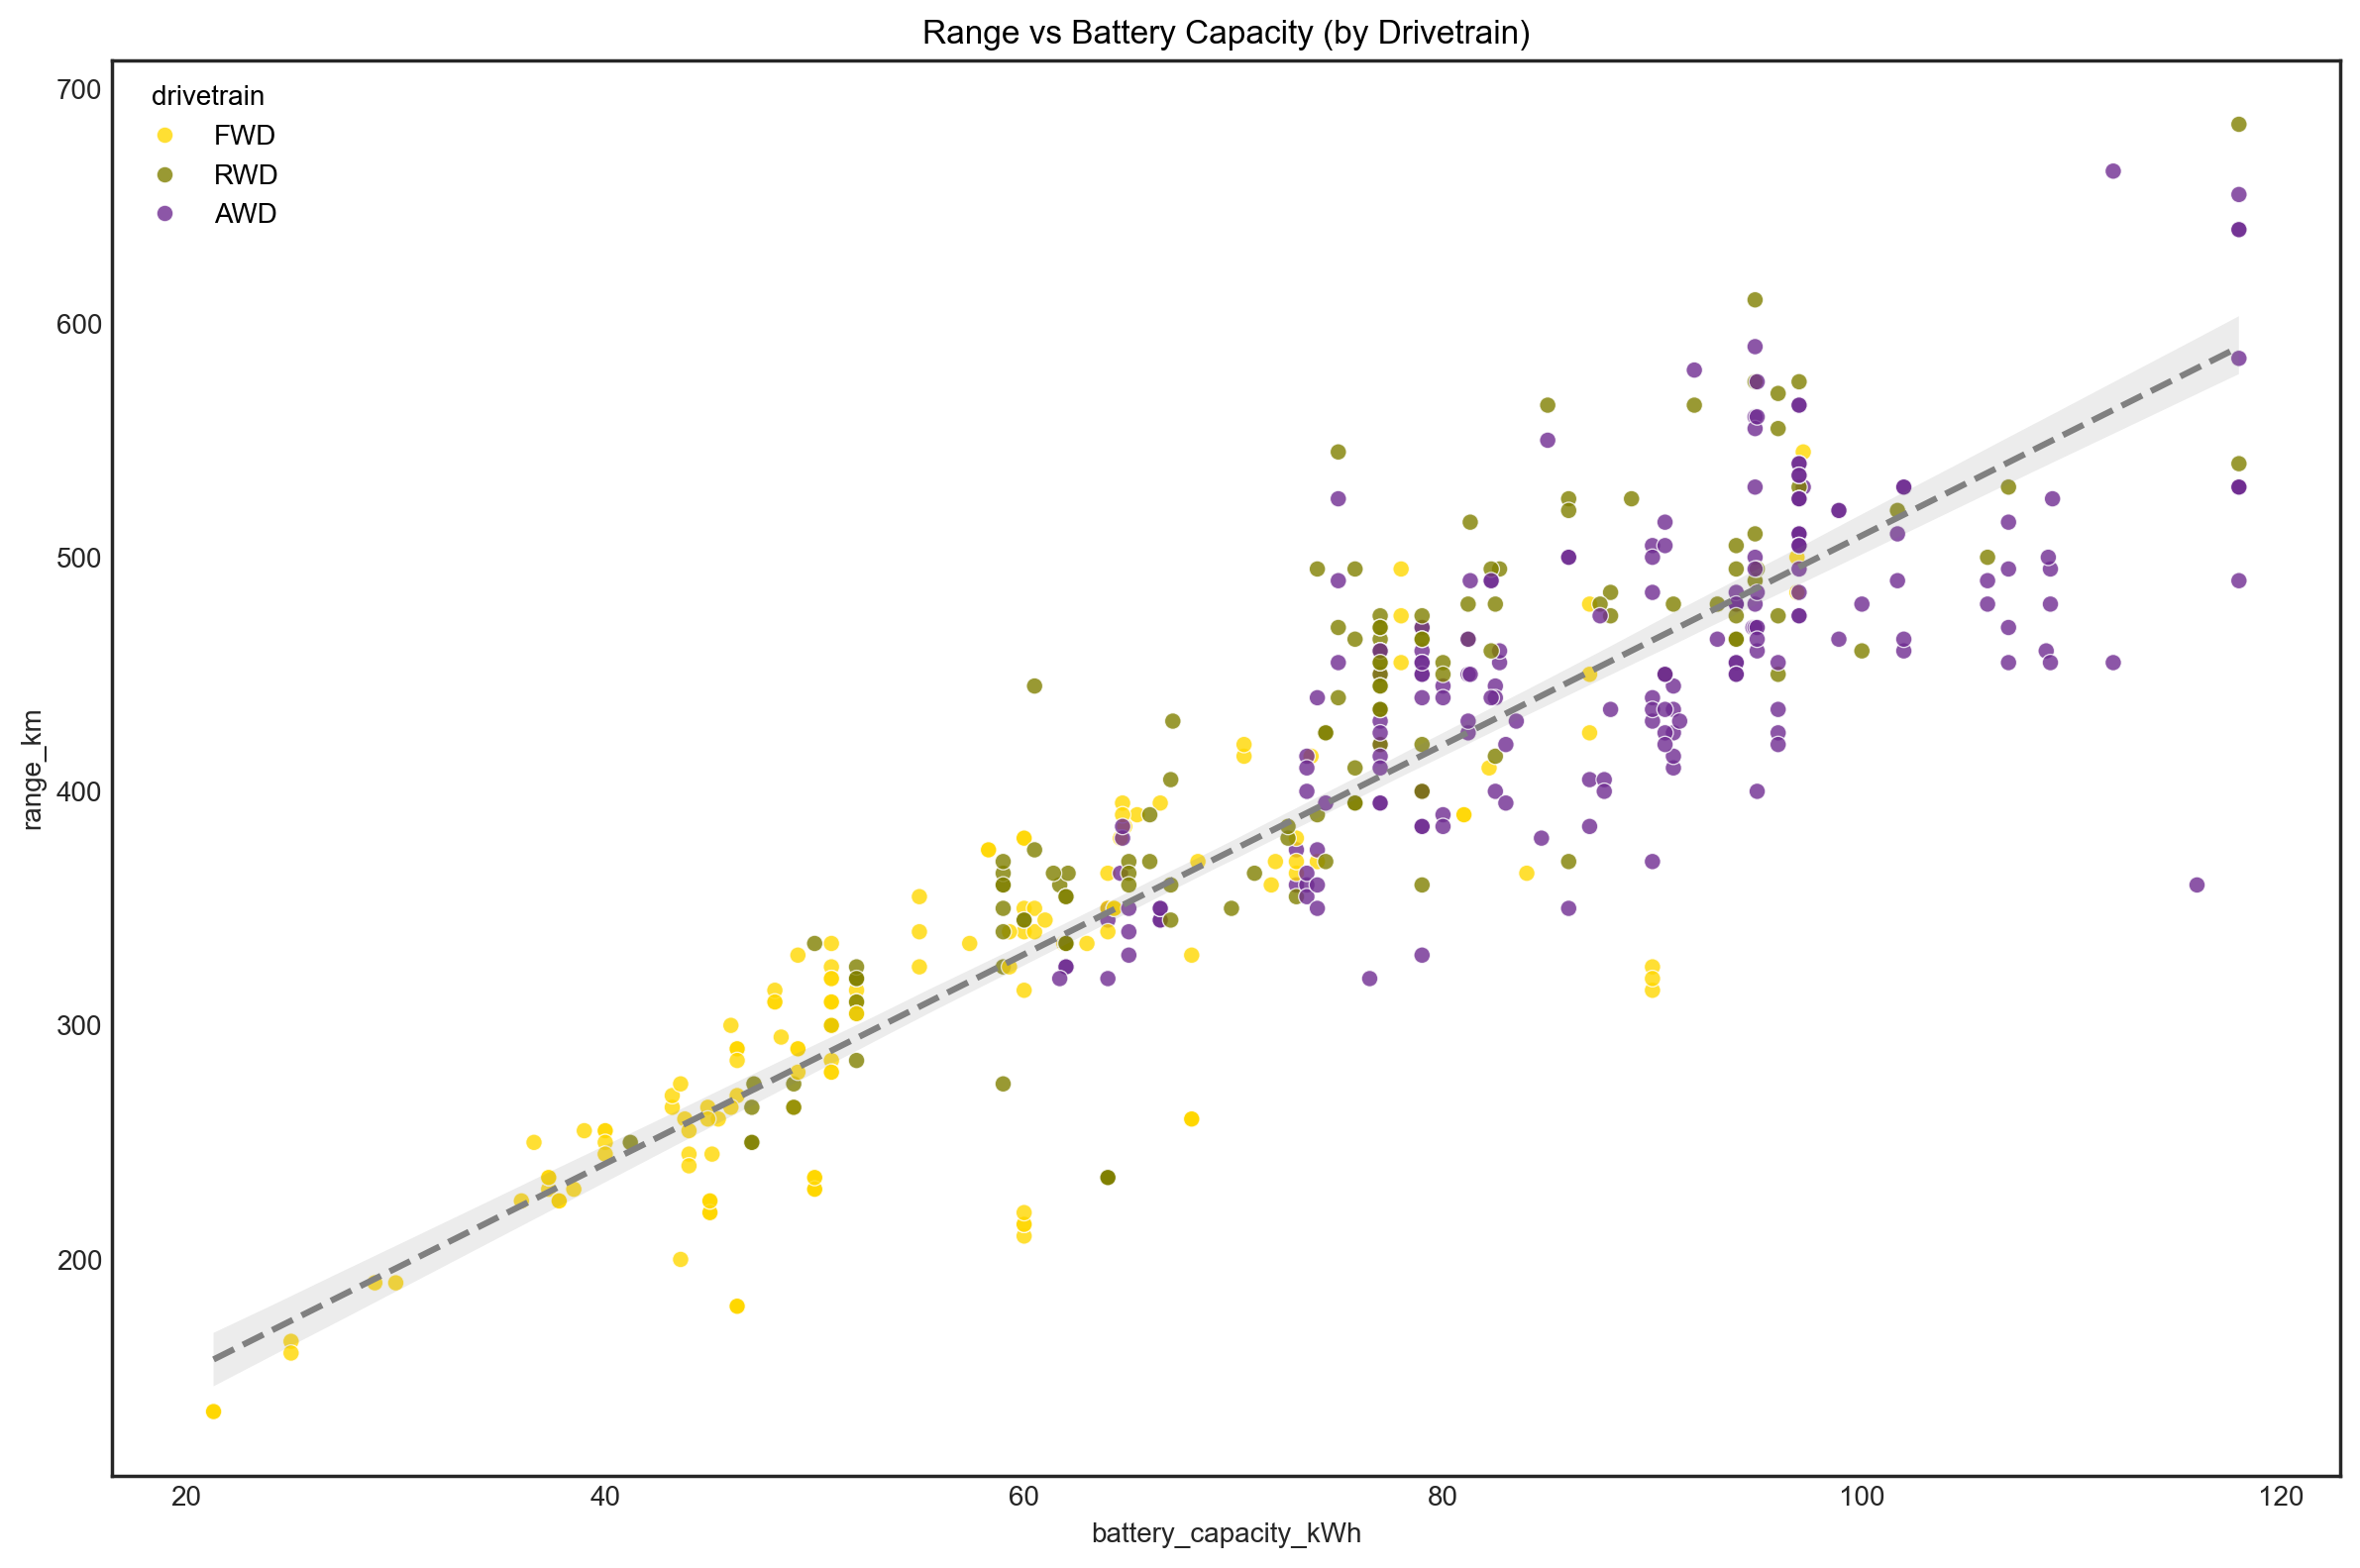

Key Observation:
The regression analysis indicates a positive linear relationship between battery capacity and electric vehicle range, revealing that as battery capacity increases,
the range of electric vehicles generally improves proportionally. However, this relationship exhibits some variance across different drivetrain types. 
Specifically:
- Front-Wheel Drive (FWD) vehicles tend to have lower battery capacities and shorter ranges.
- Rear-Wheel Drive (RWD) models show moderate range performance with increasing battery capacity.
- All-Wheel Drive (AWD) vehicles demonstrate the most consistent and often highest range performance.
The accompanying scatter plot with a regression line underscores the overall trend of increasing range with battery capacity, while also highlighting the nuanced differences in range
efficiency based on drivetrain configuration. This suggests that both battery capacity and drivetrain type are critical factors in determining an electric vehicle's range.


In [10]:
# Create a mapping of drivetrain types to their respective color indices
color_mapping = {
    'FWD': color_palette[4],  # Gold
    'RWD': color_palette[6],  # Olive
    'AWD': color_palette[7],  # Eggplant
}

# Create a scatter plot to visualize the relationship between battery capacity and range, colored by drivetrain type
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="battery_capacity_kWh", y="range_km", hue="drivetrain", palette=color_mapping,
alpha=0.8)

# Add a regression line to illustrate the overall trend in the data
sns.regplot(data=data, x="battery_capacity_kWh", y="range_km", scatter=False, color="gray", line_kws={"linestyle": "--"})

plt.title("Range vs Battery Capacity (by Drivetrain)")
plt.tight_layout()
plt.show()

# Key Observations from the Analysis
print("Key Observation:\n"
      "The regression analysis indicates a positive linear relationship between battery capacity and electric vehicle range, revealing that as battery capacity increases,\n"
      "the range of electric vehicles generally improves proportionally. However, this relationship exhibits some variance across different drivetrain types. \n"
      "Specifically:\n"
      "- Front-Wheel Drive (FWD) vehicles tend to have lower battery capacities and shorter ranges.\n"
      "- Rear-Wheel Drive (RWD) models show moderate range performance with increasing battery capacity.\n"
      "- All-Wheel Drive (AWD) vehicles demonstrate the most consistent and often highest range performance.\n"
      "The accompanying scatter plot with a regression line underscores the overall trend of increasing range with battery capacity, while also highlighting the nuanced differences in range\n"
      "efficiency based on drivetrain configuration. This suggests that both battery capacity and drivetrain type are critical factors in determining an electric vehicle's range.")

### ***Correlation Matrix Analysis***
This section investigates the relationships between various numerical features in the dataset. It aims to identify any strong correlations that may suggest multi-collinearity, which can affect model performance.

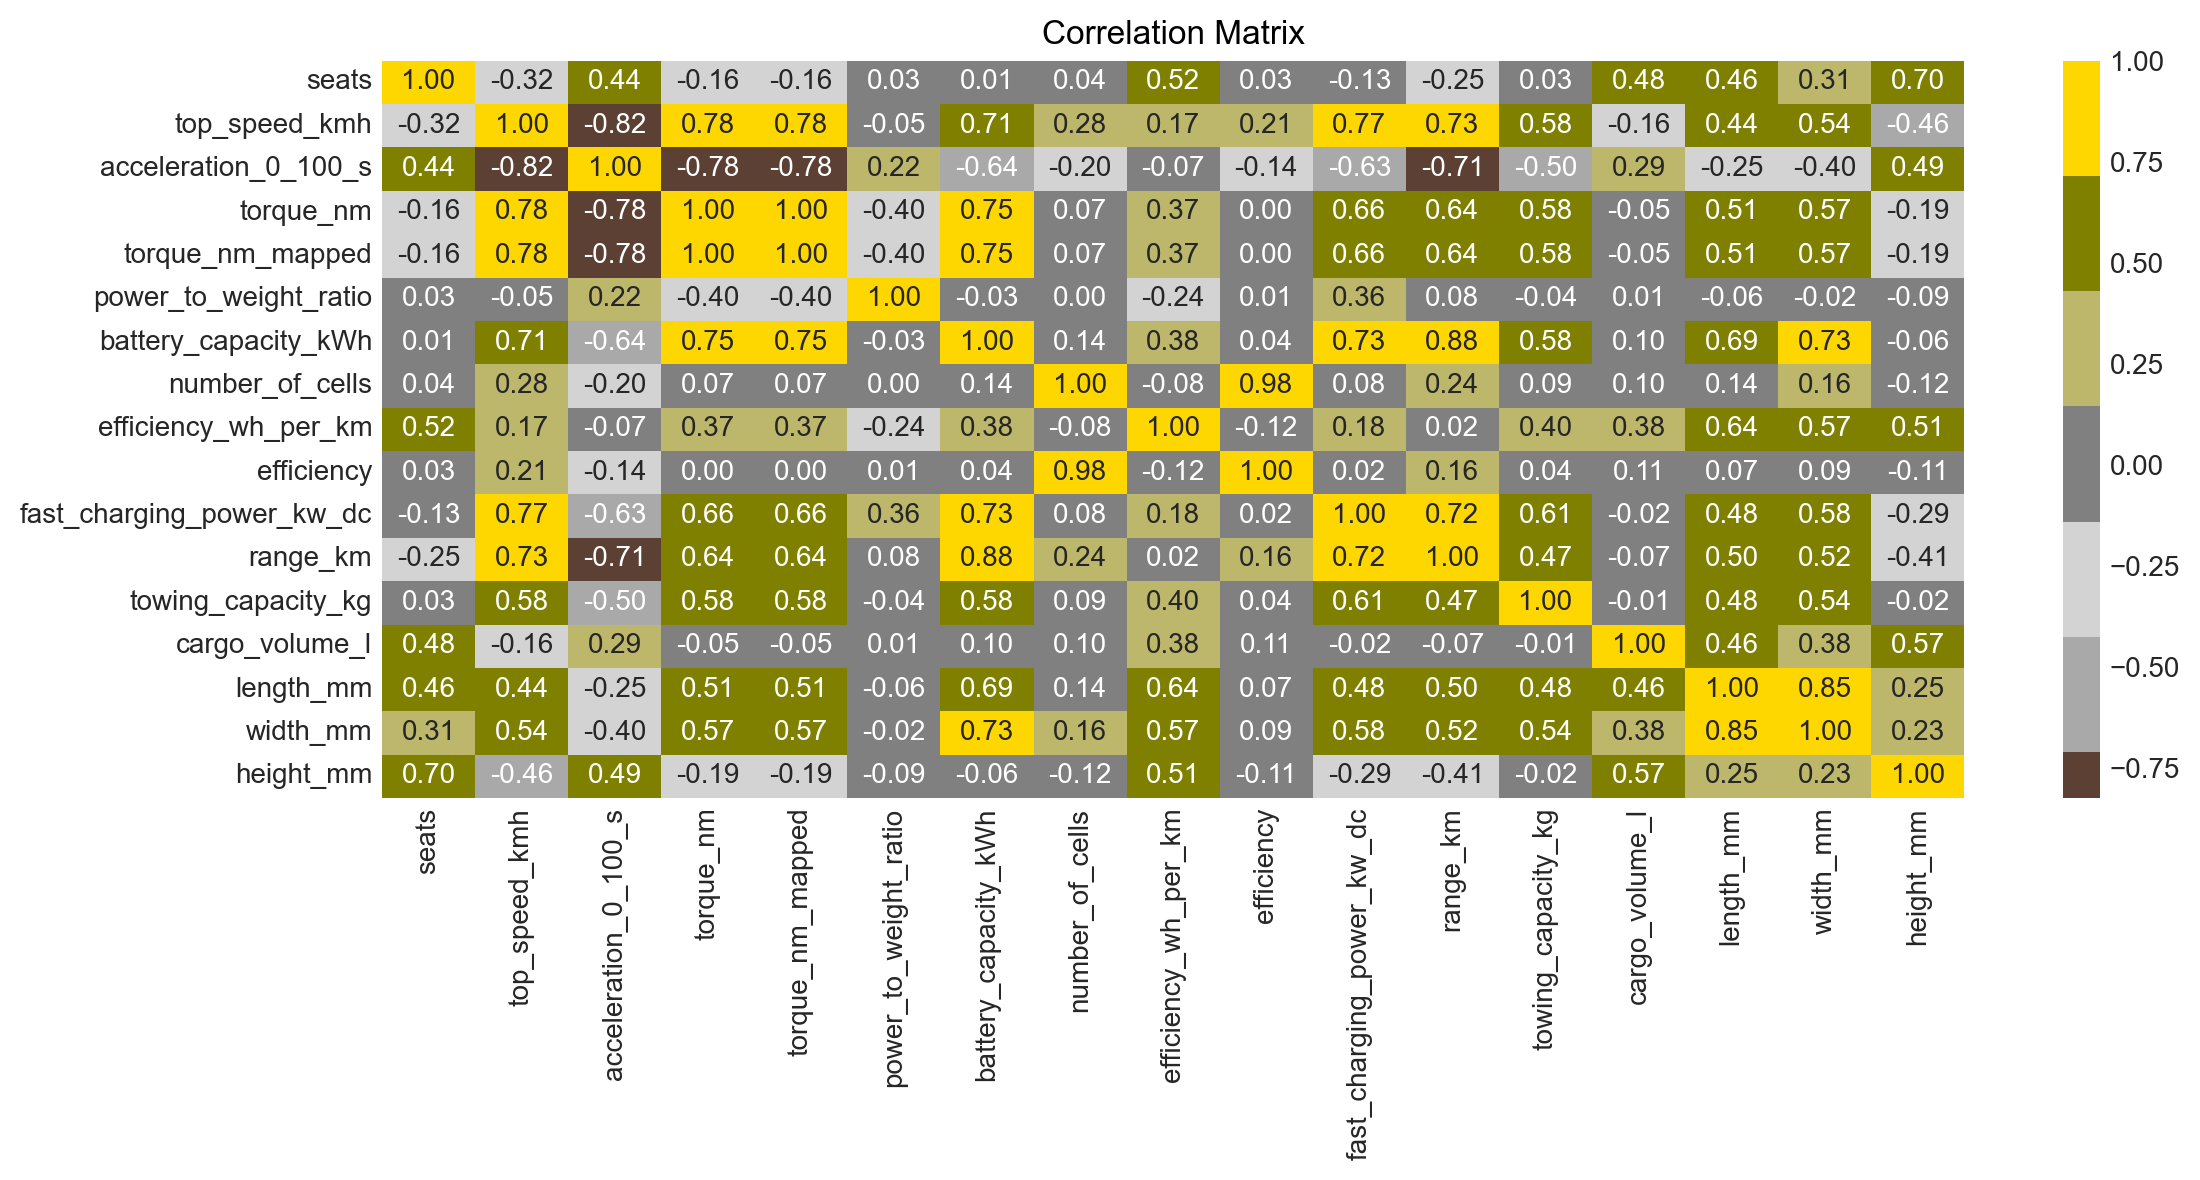

Key Observations:
The correlation matrix shows several strong relationships: battery_capacity_kWh and range_km are highly 
positively correlated (0.88), and top_speed_kmh, torque_nm, and torque_nm_mapped are strongly positively 
correlated with each other (≈0.78), while acceleration_0_100_s is strongly negatively correlated with 
top_speed_kmh, torque_nm, and torque_nm_mapped (≈-0.82 to -0.78), indicating faster cars have higher torque and 
top speed but lower 0–100 times.
Fast_charging_power_kw_dc correlates positively with battery_capacity_kWh and range_km (≈0.73), suggesting 
larger packs support higher DC charging. Efficiency_wh_per_km shows modest positive correlations with length, 
 width, height and cargo/seating features (≈0.38–0.64), implying larger vehicles tend to be less efficient.
Number_of_cells is almost perfectly correlated with efficiency (0.98), hinting at a potential scaling or encoding issue.
Power_to_weight_ratio and many comfort/cargo features show weak or negligi

In [11]:
# Select only numeric columns from the DataFrame
numeric_df = data.select_dtypes(include=['number'])

# Compute the correlation matrix to quantify the relationships between numeric features
correlation_matrix = numeric_df.corr()

# New layout color palette for the heatmap
heatmap_colors = [
    color_palette[8],  # Warm Dark Brown for strong negative correlation
    color_palette[1],  # Medium Gray for moderate negative correlation
    color_palette[0],  # Light Gray for neutral correlation
    color_palette[5],  # Gray for slight positive correlation
    color_palette[2],  # Light Olive for moderate positive correlation
    color_palette[6],  # Olive for strong positive correlation
    color_palette[4]   # Gold for very strong positive correlation
]

# Create a custom color mapping for the heatmap
# This mapping can be adjusted based on your specific needs
color_mapping = {
    -1: color_palette[8],  # Strong negative correlation
    -0.5: color_palette[1],  # Moderate negative correlation
    0: color_palette[0],  # Neutral correlation
    0.5: color_palette[5],  # Slight positive correlation
    1: color_palette[4]   # Strong positive correlation
}

# Plot the heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette(heatmap_colors), center=0, fmt='.2f')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Key Observations from the Correlation Matrix
print("Key Observations:\n"
    "The correlation matrix shows several strong relationships: battery_capacity_kWh and range_km are highly \n"
    "positively correlated (0.88), and top_speed_kmh, torque_nm, and torque_nm_mapped are strongly positively \n"
    "correlated with each other (≈0.78), while acceleration_0_100_s is strongly negatively correlated with \n"
    "top_speed_kmh, torque_nm, and torque_nm_mapped (≈-0.82 to -0.78), indicating faster cars have higher torque and \n"
    "top speed but lower 0–100 times.\n"
    "Fast_charging_power_kw_dc correlates positively with battery_capacity_kWh and range_km (≈0.73), suggesting \n"
    "larger packs support higher DC charging. Efficiency_wh_per_km shows modest positive correlations with length, \n"
    " width, height and cargo/seating features (≈0.38–0.64), implying larger vehicles tend to be less efficient.\n"
    "Number_of_cells is almost perfectly correlated with efficiency (0.98), hinting at a potential scaling or encoding issue.\n"
    "Power_to_weight_ratio and many comfort/cargo features show weak or negligible correlations.")

### ***Insight Generation and Visualization on Feature Distributions Across Automotive Brands***


Feature: top_speed_kmh — top 5 brands (from overall top 10)



,brand,mean,std,median,count
2,Maserati,278.333,53.463,290.0,3
0,Lotus,252.667,4.320,250.0,6
4,Rolls-Royce,250.000,NaN,250.0,1
3,Porsche,246.731,20.147,250.0,26
1,Lucid,240.000,36.056,250.0,3


**Findings:**  For top_speed_kmh, Maserati leads with mean 278.333 (n=3). Lotus is most consistent (std 4.320). Maserati shows highest variability (std 53.463). Single-sample brands: Rolls-Royce. The distribution for Porsche appears left-skewed (mean 246.731 < median 250.000).

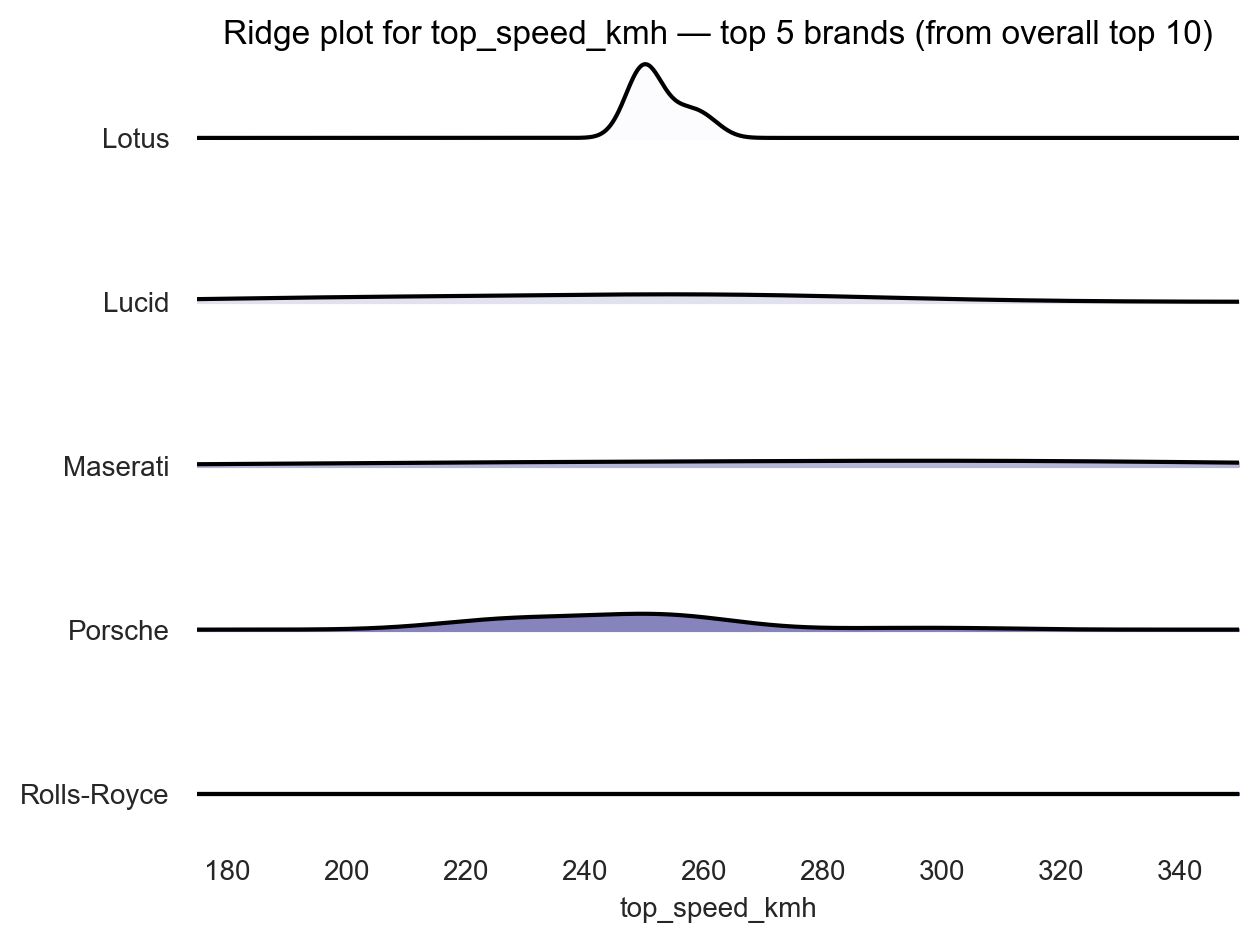


Feature: battery_capacity_kWh — top 5 brands (from overall top 10)



,brand,mean,std,median,count
1,Lotus,103.950,5.532,103.95,6
0,Cadillac,102.000,NaN,102.00,1
3,Rolls-Royce,102.000,NaN,102.00,1
4,Voyah,100.000,NaN,100.00,1
2,Lucid,98.667,11.547,92.00,3


**Findings:**  For battery_capacity_kWh, Lotus leads with mean 103.950 (n=6). Lotus is most consistent (std 5.532). Lucid shows highest variability (std 11.547). Single-sample brands: Cadillac, Rolls-Royce, Voyah.

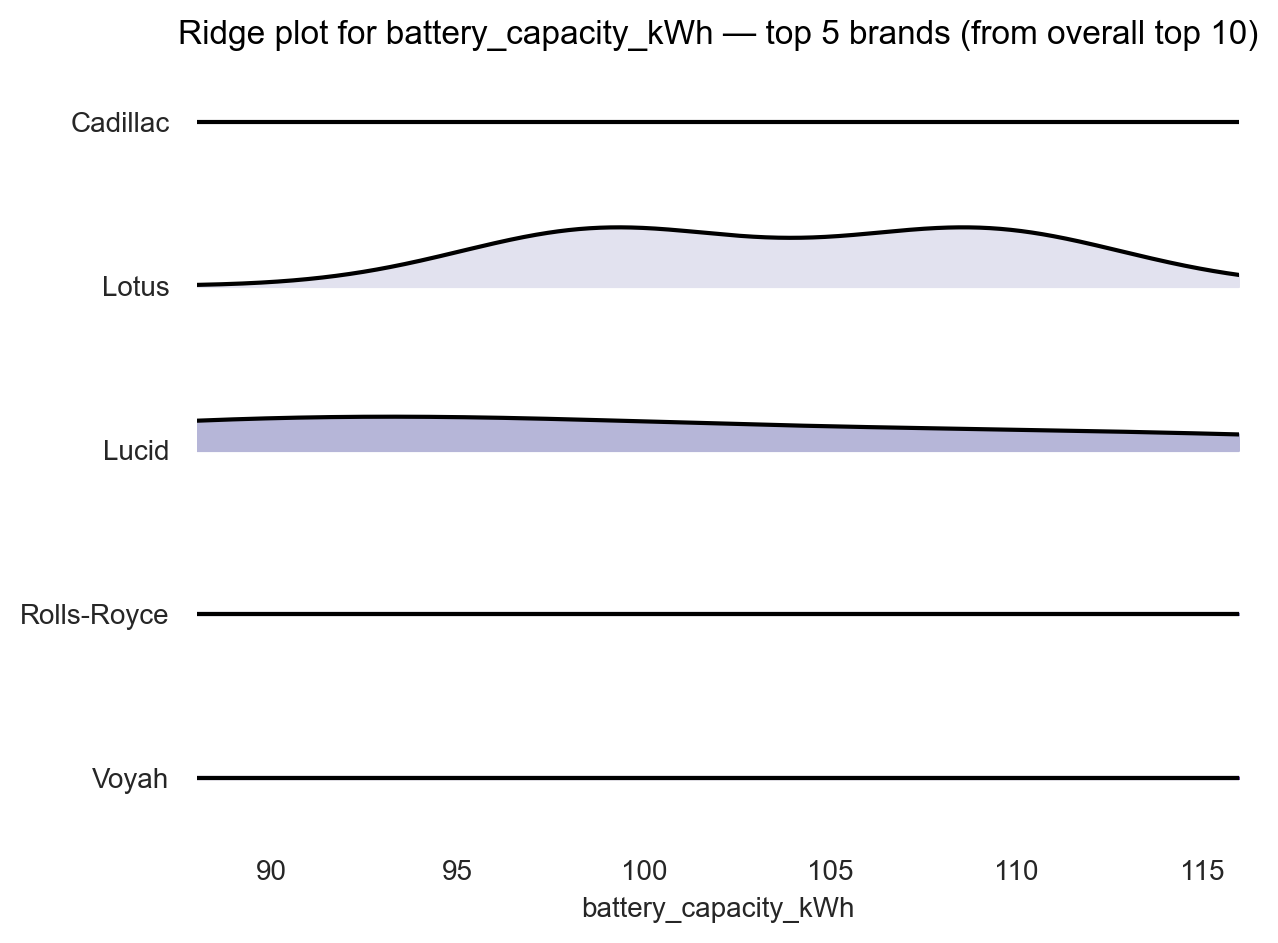


Feature: efficiency_wh_per_km — top 5 brands (from overall top 10)



,brand,mean,std,median,count
2,Lotus,219.167,26.034,213.0,6
1,Hongqi,201.333,13.577,194.0,3
3,Maserati,200.000,19.079,198.0,3
4,Voyah,200.000,NaN,200.0,1
0,Cadillac,192.000,NaN,192.0,1


**Findings:**  For efficiency_wh_per_km, Lotus leads with mean 219.167 (n=6). Hongqi is most consistent (std 13.577). Lotus shows highest variability (std 26.034). Single-sample brands: Voyah, Cadillac. The distribution for Lotus appears right-skewed (mean 219.167 > median 213.000).

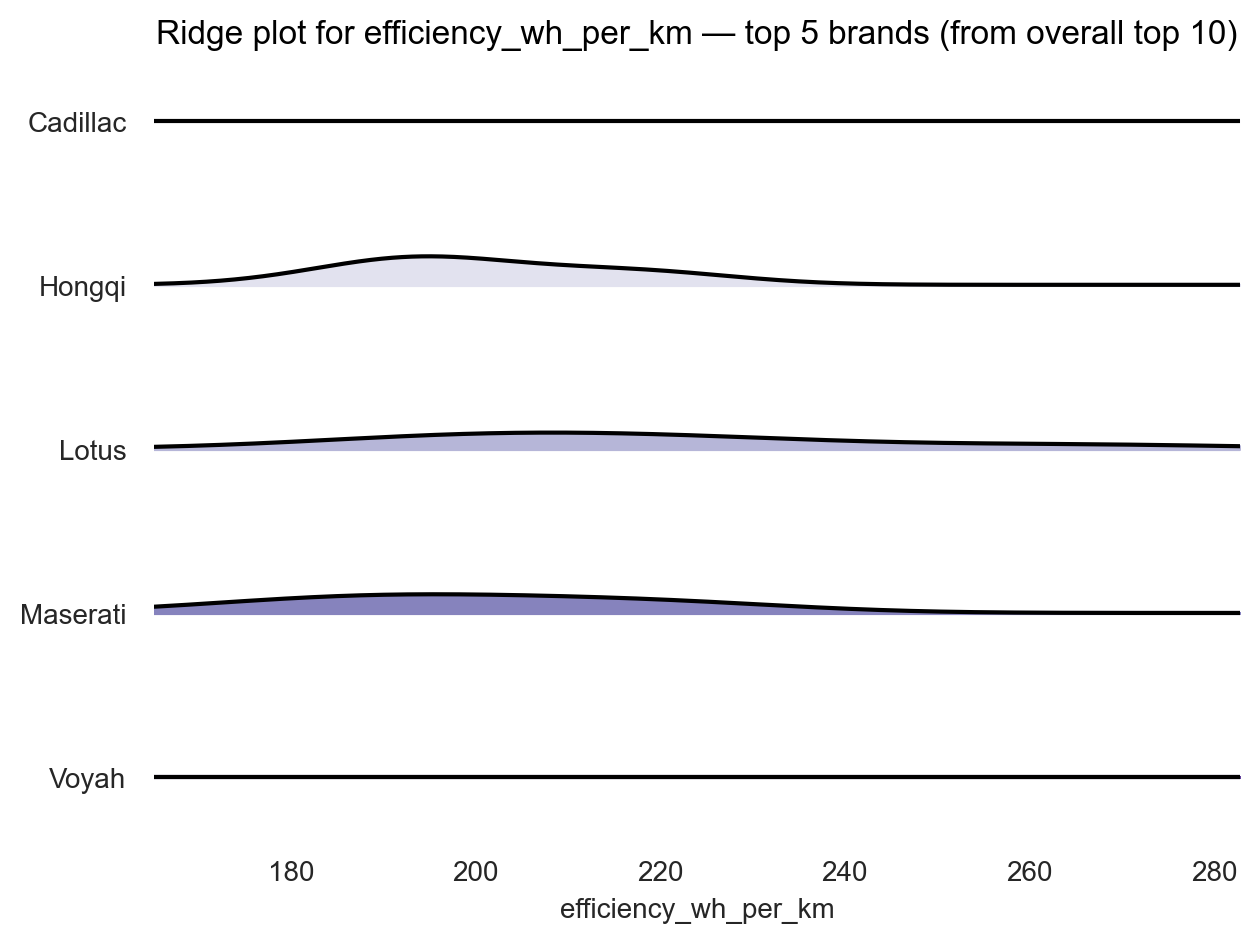


Feature: range_km — top 5 brands (from overall top 10)



,brand,mean,std,median,count
1,Lucid,603.333,53.929,580.0,3
2,Porsche,502.885,33.799,500.0,26
3,Tesla,490.000,58.224,485.0,11
0,Lotus,489.167,27.462,487.5,6
4,Voyah,480.000,NaN,480.0,1


**Findings:**  For range_km, Lucid leads with mean 603.333 (n=3). Lotus is most consistent (std 27.462). Tesla shows highest variability (std 58.224). Single-sample brands: Voyah. The distribution for Porsche appears right-skewed (mean 502.885 > median 500.000).

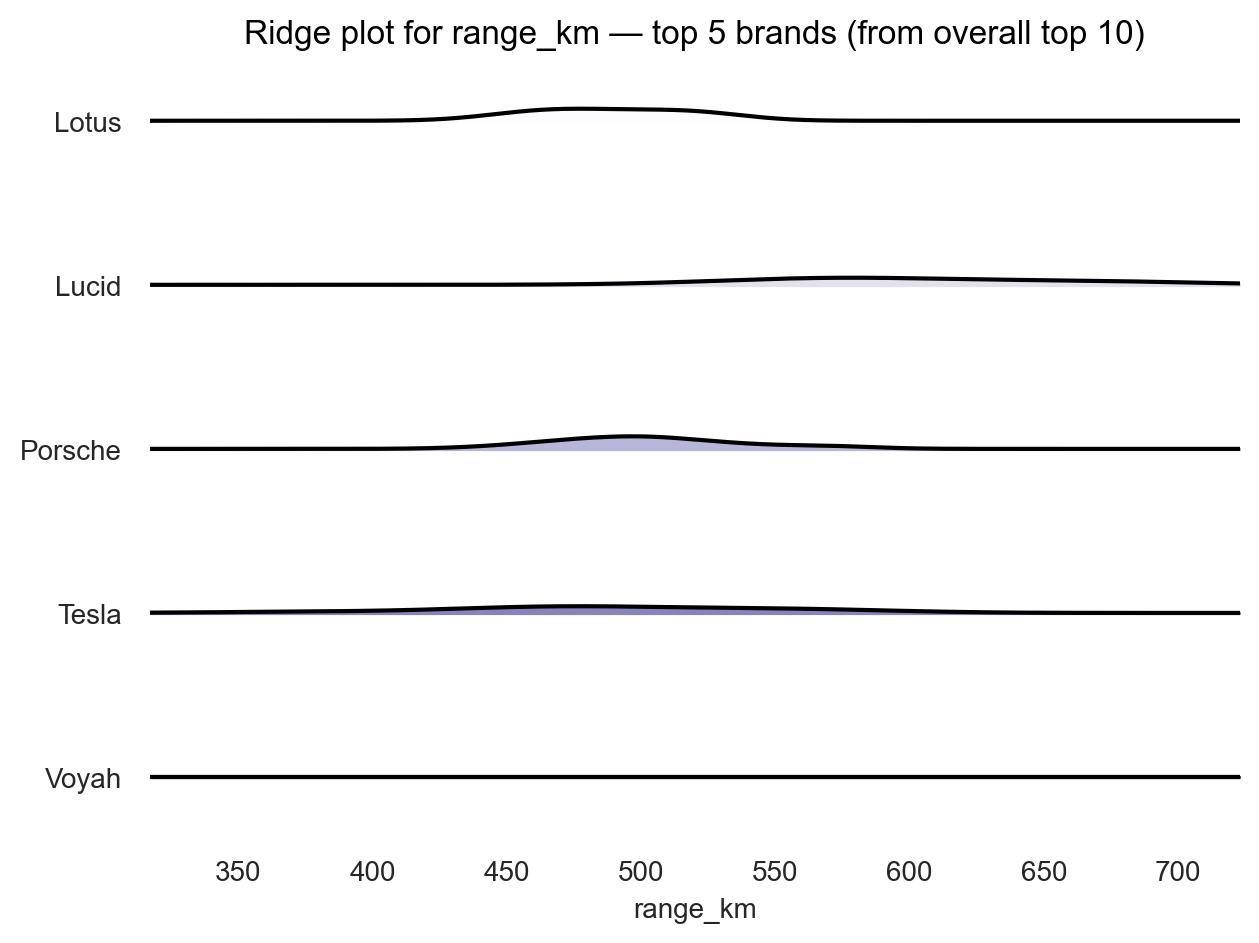


Feature: acceleration_0_100_s — top 5 brands (from overall top 10)



,brand,mean,std,median,count
0,Audi,5.489,1.481,5.65,28
2,Hongqi,5.433,0.924,4.90,3
1,Cadillac,5.300,NaN,5.30,1
3,Rolls-Royce,4.500,NaN,4.50,1
4,Voyah,4.400,NaN,4.40,1


**Findings:**  For acceleration_0_100_s, Audi leads with mean 5.489 (n=28). Hongqi is most consistent (std 0.924). Audi shows highest variability (std 1.481). Single-sample brands: Cadillac, Rolls-Royce, Voyah. The distribution for Audi appears left-skewed (mean 5.489 < median 5.650).

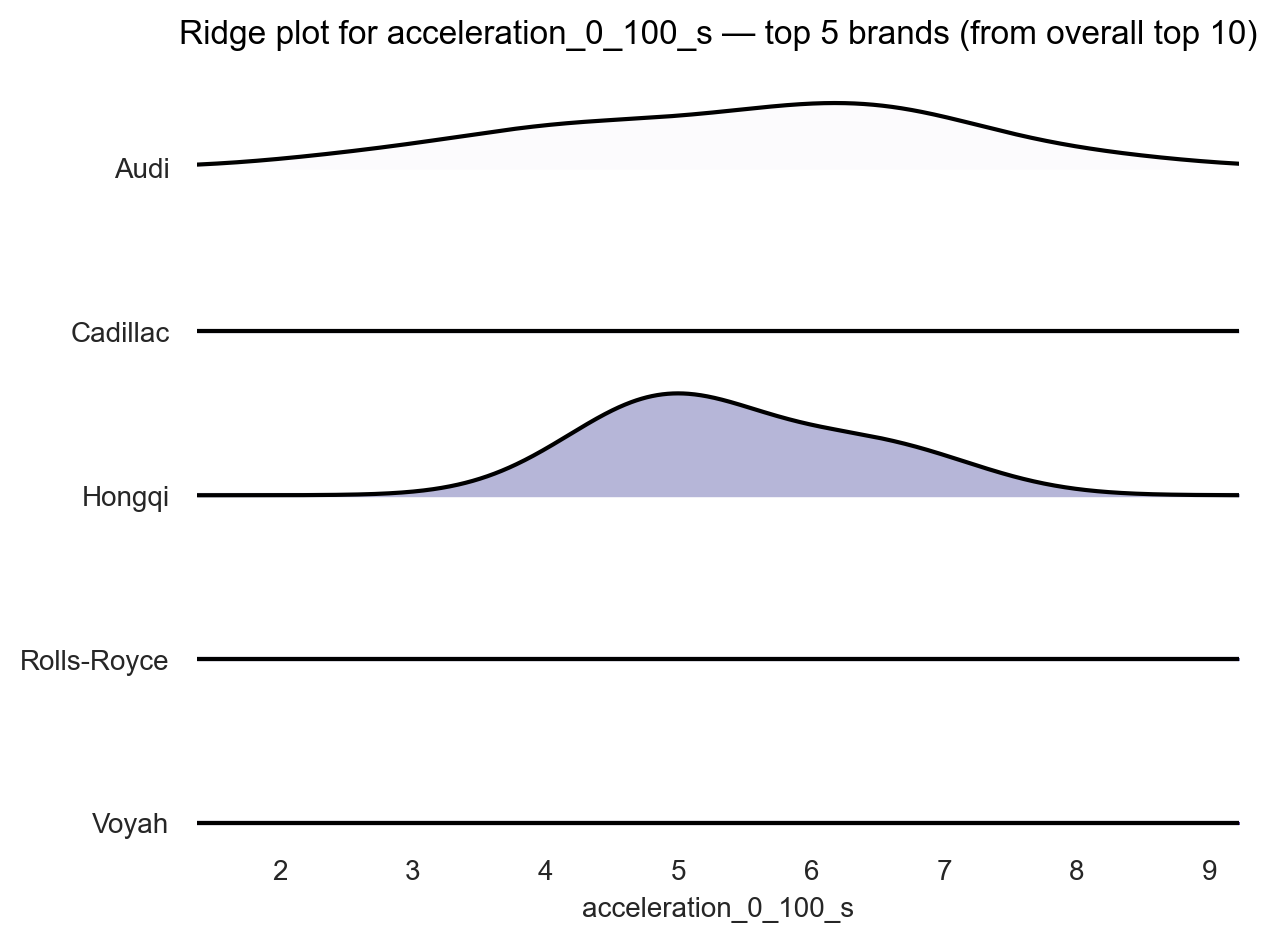


Feature: fast_charging_power_kw_dc — top 5 brands (from overall top 10)



,brand,mean,std,median,count
4,Porsche,252.000,40.673,281.0,26
1,Lotus,249.500,10.407,249.5,6
0,Audi,180.143,54.434,195.0,28
3,Maserati,172.333,55.645,190.0,3
2,Lucid,168.000,13.856,160.0,3


**Findings:**  For fast_charging_power_kw_dc, Porsche leads with mean 252.000 (n=26). Lotus is most consistent (std 10.407). Maserati shows highest variability (std 55.645). The distribution for Audi appears left-skewed (mean 180.143 < median 195.000).

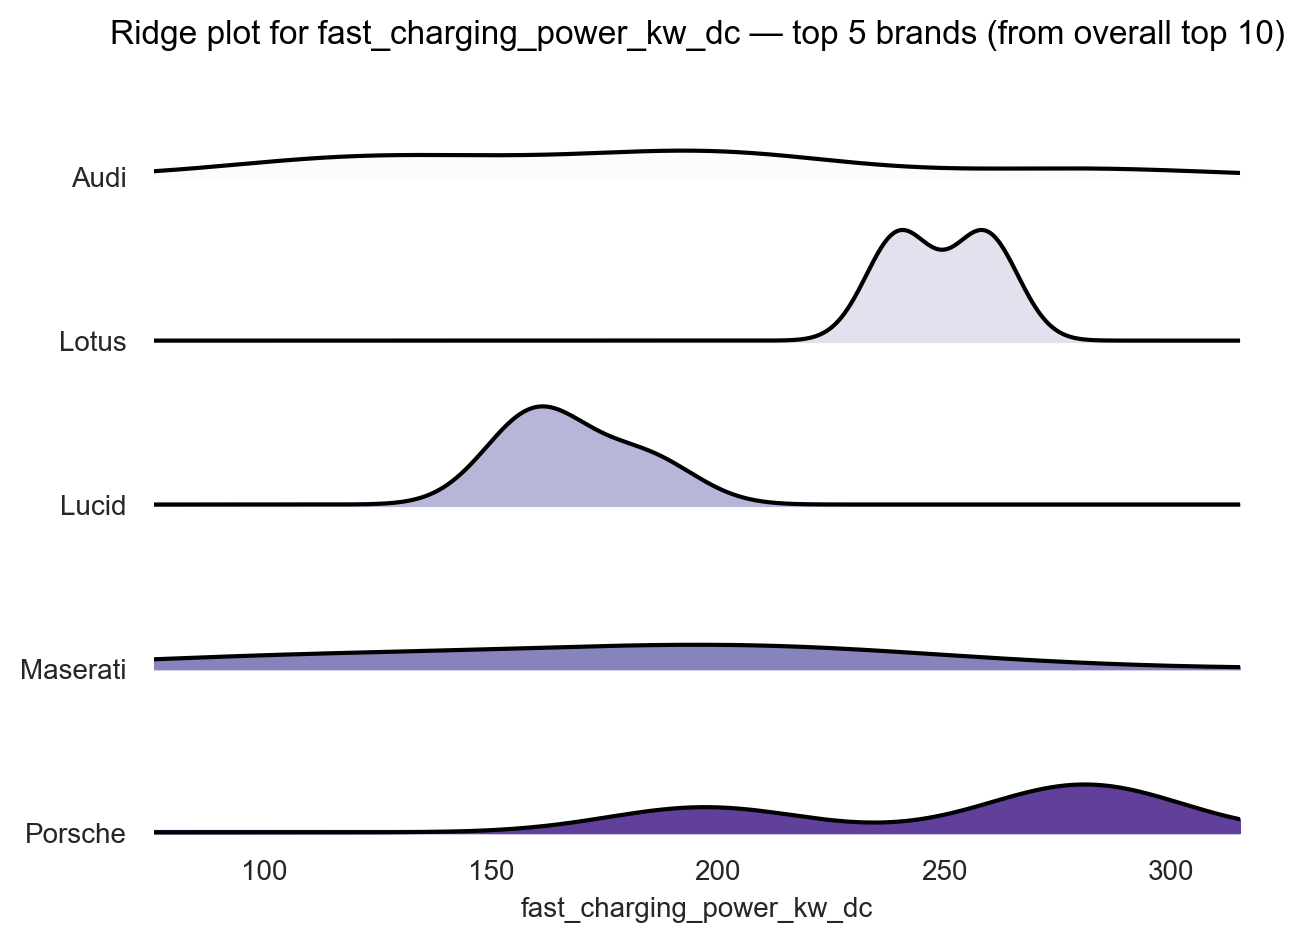


Feature: length_mm — top 5 brands (from overall top 10)



,brand,mean,std,median,count
4,Rolls-Royce,5453.0,NaN,5453.0,1
1,Hongqi,5209.0,0.000,5209.0,3
2,Lotus,5121.0,19.718,5121.0,6
0,Cadillac,5005.0,NaN,5005.0,1
3,Lucid,4975.0,0.000,4975.0,3


**Findings:**  For length_mm, Rolls-Royce leads with mean 5453.000 (n=1). Hongqi is most consistent (std 0.000). Lotus shows highest variability (std 19.718). Single-sample brands: Rolls-Royce, Cadillac.

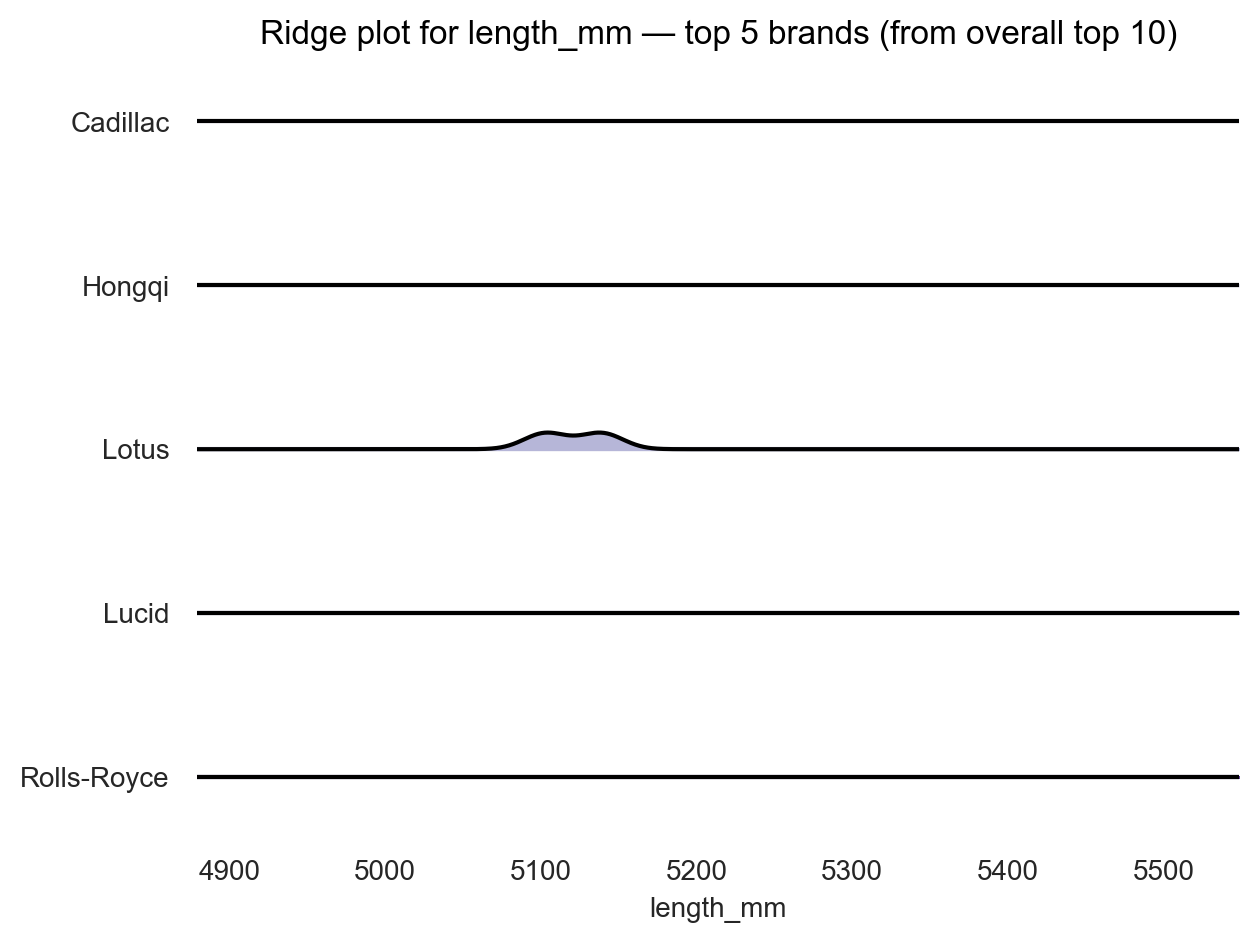


Feature: width_mm — top 5 brands (from overall top 10)



,brand,mean,std,median,count
4,Rolls-Royce,2080.000,NaN,2080.0,1
2,Lotus,2012.000,7.668,2012.0,6
1,Hongqi,2010.000,0.000,2010.0,3
0,Cadillac,1977.000,NaN,1977.0,1
3,Porsche,1961.846,10.376,1966.0,26


**Findings:**  For width_mm, Rolls-Royce leads with mean 2080.000 (n=1). Hongqi is most consistent (std 0.000). Porsche shows highest variability (std 10.376). Single-sample brands: Rolls-Royce, Cadillac. The distribution for Porsche appears left-skewed (mean 1961.846 < median 1966.000).

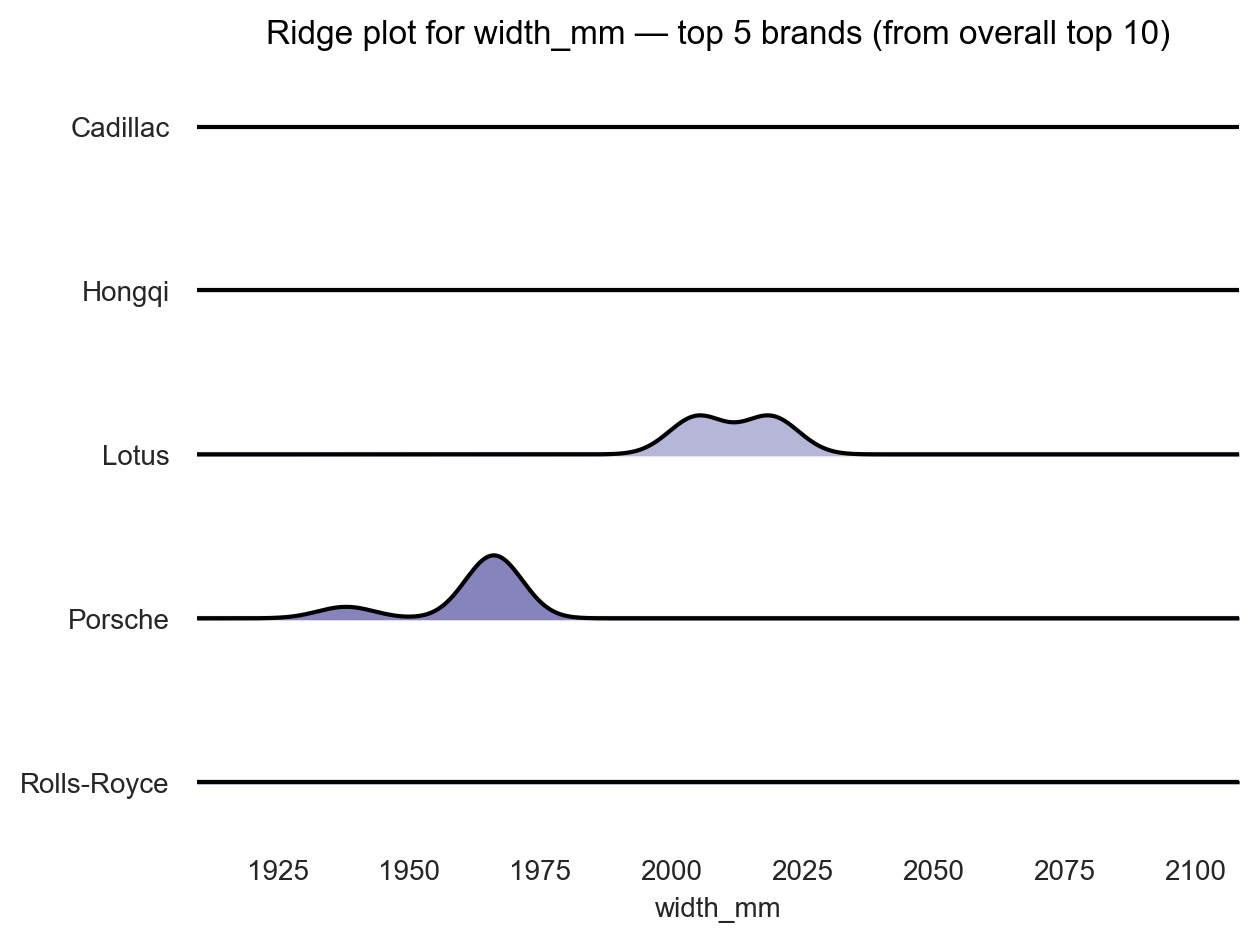


Feature: power_to_weight_ratio — top 5 brands (from overall top 10)



,brand,mean,std,median,count
4,Porsche,0.353,0.124,0.321,26
2,Lotus,0.319,0.052,0.338,6
0,Audi,0.286,0.079,0.254,28
1,Cadillac,0.270,NaN,0.270,1
3,Lucid,0.265,0.097,0.321,3


**Findings:**  For power_to_weight_ratio, Porsche leads with mean 0.353 (n=26). Lotus is most consistent (std 0.052). Porsche shows highest variability (std 0.124). Single-sample brands: Cadillac. The distribution for Audi appears right-skewed (mean 0.286 > median 0.254).

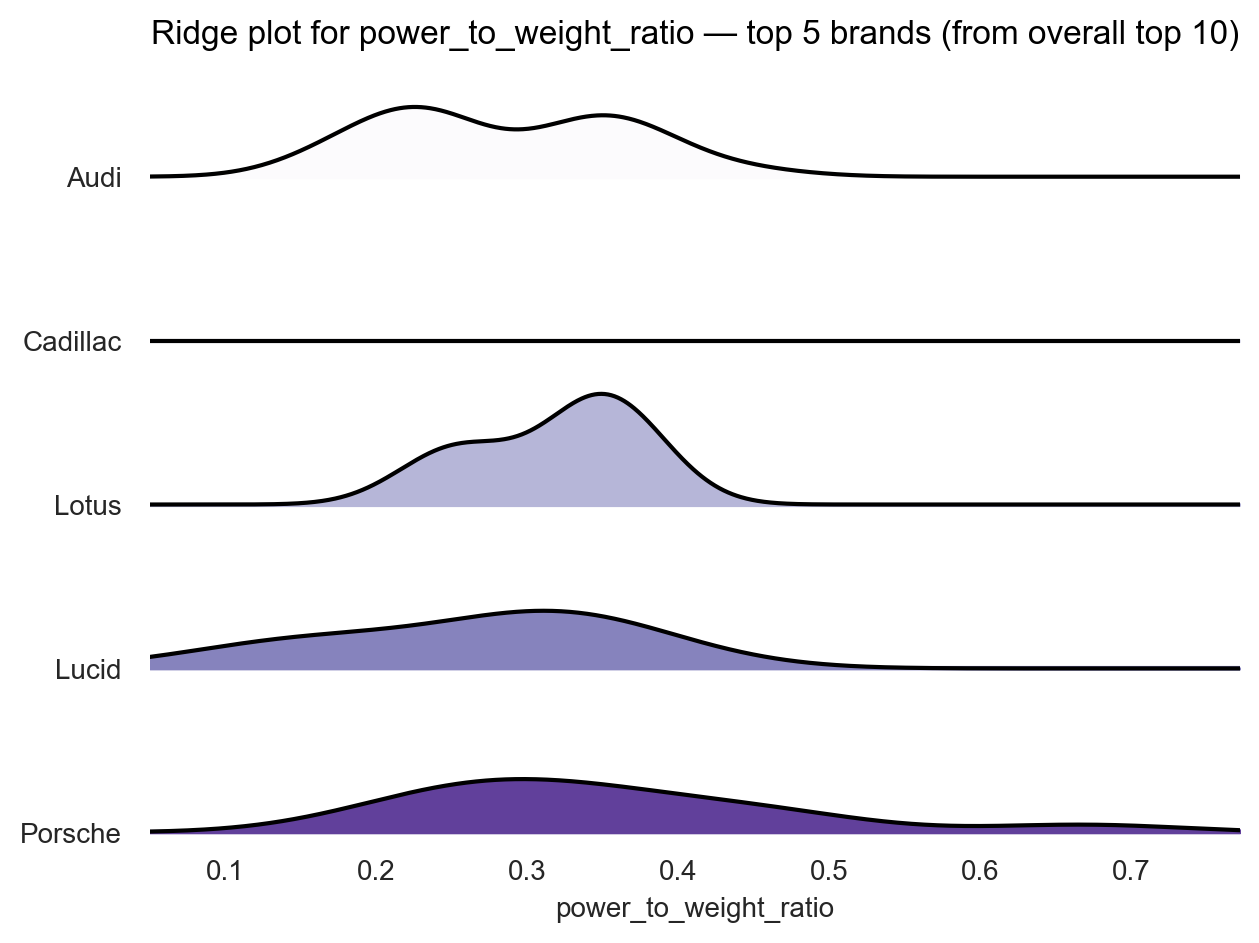


Feature: efficiency — top 5 brands (from overall top 10)



,brand,mean,std,median,count
4,Tesla,70.351,11.618,72.992,11
2,Lucid,58.773,0.134,58.696,3
3,Porsche,3.886,0.912,4.082,26
1,Cadillac,2.824,NaN,2.824,1
0,Audi,2.742,0.977,1.979,28


**Findings:**  For efficiency, Tesla leads with mean 70.351 (n=11). Lucid is most consistent (std 0.134). Tesla shows highest variability (std 11.618). Single-sample brands: Cadillac. The distribution for Audi appears right-skewed (mean 2.742 > median 1.979).

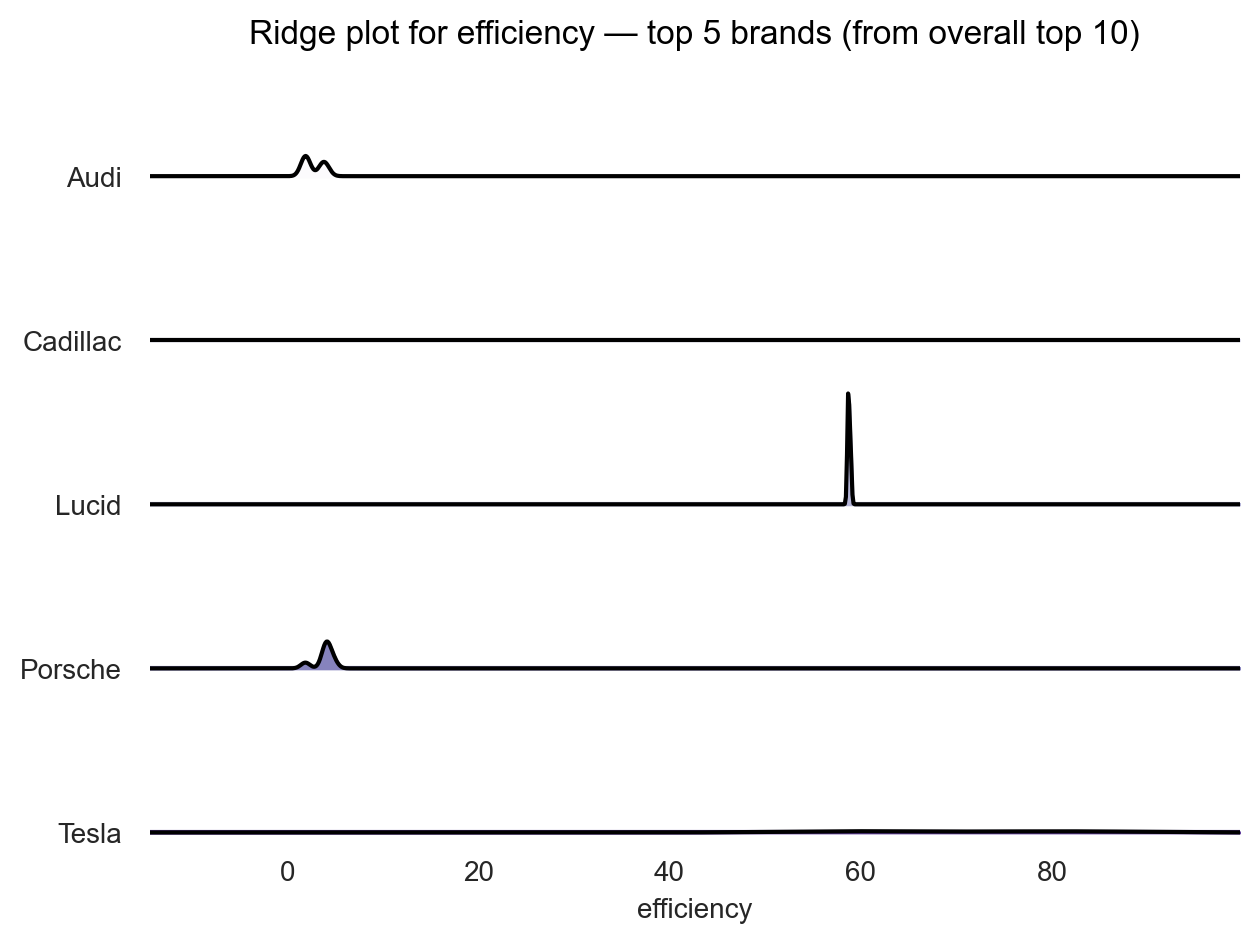

In [12]:
def derive_statistics_report(summary, feature):
    """
    Analyzes a summary of statistical data regarding car brands and their performance features.
    
    Build a short findings paragraph from a summary DataFrame with columns:
    ['brand','mean','std','median','count'] (sorted by mean desc).
    
    Parameters:
    - summary: DataFrame containing aggregated statistics for each brand.
    - feature: The feature being analyzed (string).
    
    Returns:
    - A string summarizing the findings for the specified feature.
    """
    if summary.empty:
        return f"No data for {feature}."
    
    # Numeric types for statistical calculations
    summary = summary.copy()
    summary[['mean', 'std', 'median']] = summary[['mean', 'std', 'median']].astype(float)

    # Identify the top brand based on mean value
    top_brand = summary.iloc[0]
    
    # Filter brands with more than one sample for consistency and variability analysis
    multi = summary[summary['count'] > 1].copy()
    most_consistent = None
    most_variable = None
    if not multi.empty:
        most_consistent = multi.loc[multi['std'].idxmin()]  # Brand with the lowest standard deviation
        most_variable = multi.loc[multi['std'].idxmax()]    # Brand with the highest standard deviation

    # Collect brands with only one sample
    singletons = summary[summary['count'] == 1]['brand'].tolist()

    # Determine skewness based on the largest sample size
    largest_sample = summary.loc[summary['count'].idxmax()]
    skew_note = ""
    if largest_sample['mean'] > largest_sample['median'] + 1e-9:
        skew_note = (f" The distribution for {largest_sample['brand']} appears right-skewed "
                     f"(mean {largest_sample['mean']:.3f} > median {largest_sample['median']:.3f}).")
    elif largest_sample['mean'] < largest_sample['median'] - 1e-9:
        skew_note = (f" The distribution for {largest_sample['brand']} appears left-skewed "
                     f"(mean {largest_sample['mean']:.3f} < median {largest_sample['median']:.3f}).")

    # Construct the findings paragraph
    parts = []
    parts.append(f"For {feature}, {top_brand['brand']} leads with mean {top_brand['mean']:.3f} (n={int(top_brand['count'])}).")
    if most_consistent is not None:
        parts.append(f"{most_consistent['brand']} is most consistent (std {most_consistent['std']:.3f}).")
    if most_variable is not None and most_variable['brand'] != (most_consistent['brand'] if most_consistent is not None else None):
        parts.append(f"{most_variable['brand']} shows highest variability (std {most_variable['std']:.3f}).")
    if singletons:
        parts.append("Single-sample brands: " + ", ".join(singletons) + ".")
    if skew_note:
        parts.append(skew_note.strip())

    return " ".join(parts)

melted = pd.read_csv('../data/vehicles_long_for_plot.csv')

# Data preparation 
num = melted[melted['is_numeric']].copy()
num['value'] = pd.to_numeric(num['value'], errors='coerce')

# Identify the top 10 brands based on mean value
overall_top10 = (num.dropna(subset=['value'])
                   .groupby('brand')['value']
                   .mean()
                   .nlargest(10)
                   .index.tolist())

# List of selected features for analysis
selected_feats = ["top_speed_kmh", "battery_capacity_kWh", "efficiency_wh_per_km",
                  "range_km", "acceleration_0_100_s", "fast_charging_power_kw_dc",
                  "length_mm", "width_mm", "power_to_weight_ratio", "efficiency"]

# Loop through each selected feature to analyze and visualize
for feature in selected_feats:
    feat_df = num[(num['feature'] == feature) & (num['brand'].isin(overall_top10))].dropna(subset=['value']).copy()
    if feat_df.empty:
        print(f"No numeric data for feature: {feature}")
        continue

    # Identify the top 5 brands for the current feature
    top5_by_feature = feat_df.groupby('brand')['value'].mean().nlargest(5).index.tolist()
    subset = feat_df[feat_df['brand'].isin(top5_by_feature)].copy()

    # Summarize statistics for the top brands
    summary = (subset.groupby('brand')['value']
                     .agg(mean='mean', std='std', median='median', count='count')
                     .reset_index()
                     .sort_values('mean', ascending=False))
    
    # Round the summary statistics for better readability
    summary[['mean', 'std', 'median']] = summary[['mean', 'std', 'median']].round(3)

    # Display the summary DataFrame for the current feature
    print(f"\nFeature: {feature} — top 5 brands (from overall top 10)\n")
    display(summary)

    # Generate tailored findings based on the summary statistics
    findings = derive_statistics_report(summary, feature)
    display(Markdown("**Findings:**  " + findings))

    # Create a ridge plot to visualize the distribution of values for the top brands
    joypy.joyplot(data=subset, by='brand', column='value', kind='kde', colormap=plt.cm.Purples)
    plt.title(f"Ridge plot for {feature} — top 5 brands (from overall top 10)")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

In [13]:
# # Reset the index before saving to CSV
data.reset_index(drop=True, inplace=True)

In [14]:
# Saving the analyzed  DataFrame to a new CSV file
data.to_csv('../data/final_vehicle_data.csv', index=False)
print("\nAnalyzed DataFrame saved to 'final_vehicle_data.csv'.")


Analyzed DataFrame saved to 'final_vehicle_data.csv'.


In [15]:
# Loading the second dataset for the automated data cleaning pipeline
# Using pd.read_csv from the pandas library to load a CSV file containing vehicle data
df_2 = pd.read_csv('../data/el_vehicles_2.csv')

class DataProcessor:
    def __init__(self):
        # Initializing an empty dictionary to store DataFrames indexed by their file paths
        self.dataframes = {}

    def read_csv(self, file_path):
        """Read a CSV file into a DataFrame."""
        try:
            # Attempt to read the CSV file and store the result in a DataFrame
            df_2 = pd.read_csv(file_path)
            # Saving the DataFrame into the 'dataframes' dictionary using the file path as the key
            self.dataframes[file_path] = df_2
            return df_2
        except Exception as e:
            # Catching exceptions and printing an error message if the file cannot be read
            print(f"Error reading CSV file: {str(e)}")
            return None

    def clean_dataframe(self, df_2):
        """Clean the DataFrame by handling missing values and normalizing text."""
        if df_2 is None:
            # If the DataFrame is None, return None to avoid further processing
            return None
        
        # Interpolating missing values in the 'Autonomous_Level' column using linear interpolation
        df_2['Autonomous_Level'] = df_2['Autonomous_Level'].interpolate(method='linear')

        # Dropping the 'CO2_Emissions_g_per_km' column as it's not needed
        df_2.drop(columns=['CO2_Emissions_g_per_km'], inplace=True)

        # Filling missing values in 'Safety_Rating' with the median of that column
        df_2.loc[:, 'Safety_Rating'] = df_2['Safety_Rating'].fillna(df_2['Safety_Rating'].median())

        # Normalizing text data in categorical (object) columns
        for col in df_2.select_dtypes(include=['object']).columns:
            # Convert all text in the column to lowercase
            df_2[col] = df_2[col].str.lower()  
            # Remove special characters from the text using a regex
            df_2[col] = df_2[col].apply(lambda x: re.sub(r'[^\w\s]', '', x) if isinstance(x, str) else x)
            
        # Convert 'Country_of_Manufacture' to uppercase
        df_2['Country_of_Manufacture'] = df_2['Country_of_Manufacture'].str.upper()  
            
        # Print unique values for each column to help with data understanding (commented out)
        for column in df_2.columns:
            unique_values = df_2[column].unique()
            # print(f"Unique values in '{column}': {unique_values}")  # Uncomment to see the unique values
        
        return df_2  # Return the cleaned DataFrame
    
    def save_cleaned_data(self, df_2, output_dir, file_name):
        """Save the cleaned DataFrame to a new CSV file."""
        # Check if the output directory exists, create it if it doesn't
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        
        # Creating the full path for the output file
        output_file = os.path.join(output_dir, file_name)
        # Save the DataFrame to a CSV file (index=False) to avoid writing row indices
        df_2.to_csv(output_file, index=False)
        print(f"Cleaned data saved to {output_file}")  # Notify location of saved data

# Instantiating the DataProcessor class
processor = DataProcessor()
# Reading the CSV file into a DataFrame
df_2 = processor.read_csv('../data/el_vehicles_2.csv')  
# Cleaning the DataFrame using the defined method
cleaned_df = processor.clean_dataframe(df_2)
# Saving the cleaned DataFrame to the specified output directory
processor.save_cleaned_data(cleaned_df, '../data', 'cleaned_ev_2.csv')

Cleaned data saved to ../data\cleaned_ev_2.csv


In [16]:
# Creating common columns with more control for merging datasets.
# The 'key' column for the first dataset is generated by combining the 'brand' and 'car_model' columns,
# stripping any leading/trailing whitespace, and converting the result to lowercase for consistency.
data['key'] = (data['brand'] + ' ' + data['car_model']).str.strip().str.lower()

# Similarly, creating a 'key' column for the second dataset by combining 'Manufacturer' and 'Model',
# ensuring that it is also stripped of whitespace and converted to lowercase for uniformity.
df_2['key'] = (df_2['Manufacturer'] + ' ' + df_2['Model']).str.strip().str.lower()

# Merge the two datasets on the common 'key' column.
# This operation includes only rows from both datasets that have matching keys,
# resulting in a new DataFrame containing the intersecting pairs (in this case, 38 pairs).
merged_data = pd.merge(data, df_2, on='key', how='inner') 

# Display the final merged dataset, which now contains combined information from both original datasets.
merged_data

,brand,car_model,segment,drivetrain,seats,top_speed_kmh,acceleration_0_100_s,torque_nm,torque_nm_mapped,power_to_weight_ratio,...,Range_km,Charging_Type,Charge_Time_hr,Price_USD,Color,Country_of_Manufacture,Autonomous_Level,Safety_Rating,Units_Sold_2024,Warranty_Years
0,Kia,Niro EV,JC - Medium,FWD,5,167,7.8,255.0,188.07831,0.274510,...,178,dc fast charging dcfc,2.5,12274177,champagne,AUSTRALIA,4.0,5.0,10590,5
1,Kia,Niro EV,JC - Medium,FWD,5,167,7.8,255.0,188.07831,0.274510,...,158,battery swapping,8.2,8873808,emerald green,HUNGARY,4.0,4.0,15003,5
2,Kia,Niro EV,JC - Medium,FWD,5,167,7.8,255.0,188.07831,0.274510,...,186,level 1 charging,7.4,347694,matte white,SAUDI ARABIA,0.0,4.0,6656,4
3,Kia,Niro EV,JC - Medium,FWD,5,167,7.8,255.0,188.07831,0.274510,...,152,chademo,9.7,10047805,navy blue,INDIA,4.0,5.0,15512,3
4,Maserati,Grecale Folgore,JE - Executive,AWD,5,220,4.1,820.0,604.80084,0.134146,...,344,nacs,1.2,9093942,rose gold,NORWAY,3.0,4.0,3928,5
5,Maserati,Grecale Folgore,JE - Executive,AWD,5,220,4.1,820.0,604.80084,0.134146,...,499,level 2 charging,9.2,14395341,metallic silver,GERMANY,1.0,5.0,7142,4
6,Maserati,Grecale Folgore,JE - Executive,AWD,5,220,4.1,820.0,604.80084,0.134146,...,523,chademo,1.3,4991073,magenta,IRELAND,4.0,4.0,9964,5
7,Maserati,Grecale Folgore,JE - Executive,AWD,5,220,4.1,820.0,604.80084,0.134146,...,190,level 2 charging,12.0,7763935,champagne,NORWAY,2.0,4.0,18610,5
8,Maserati,Grecale Folgore,JE - Executive,AWD,5,220,4.1,820.0,604.80084,0.134146,...,112,ultrafast charging 350 kw,6.7,10631302,ice silver,USA,0.0,5.0,10076,3
9,Maserati,Grecale Folgore,JE - Executive,AWD,5,220,4.1,820.0,604.80084,0.134146,...,422,inductive wireless charging,10.4,8090513,yellow,SWITZERLAND,5.0,4.0,2363,5


In [17]:
# Saving merged dataset to CSV file (for use in sqlite3 analysis)
merged_data.to_csv('../data/merged_vehicles.db.csv', index=False)
print("\nMerged DataFrame saved to 'merged_vehicles.db.csv'.")


Merged DataFrame saved to 'merged_vehicles.db.csv'.
